# Activity 4: Data Preparation and Cleaning for Credit card fraud detection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Task 1: Load the dataset 

train_df = pd.read_csv('./fraud_datasets/fraudTrain.csv')
test_df = pd.read_csv('./fraud_datasets/fraudTest.csv')

# Task 2: Explore the data entries and shape of the datasets
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)

Train Dataset Shape: (1296675, 23)
Test Dataset Shape: (555719, 23)


In [ ]:
# Task 3: Displaying the first few rows of the datasets
train_df.head(5)
test_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# Task 4: Displaying the column info of the datasets
print("Train Dataset Info:")
train_df.info()
print("\n")
print("Test Dataset Info:")
test_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14

In [ ]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


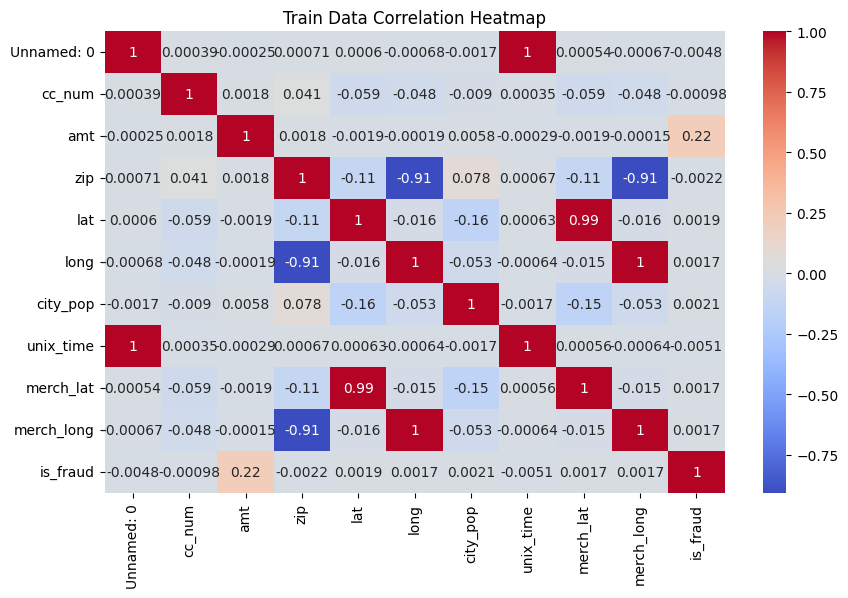

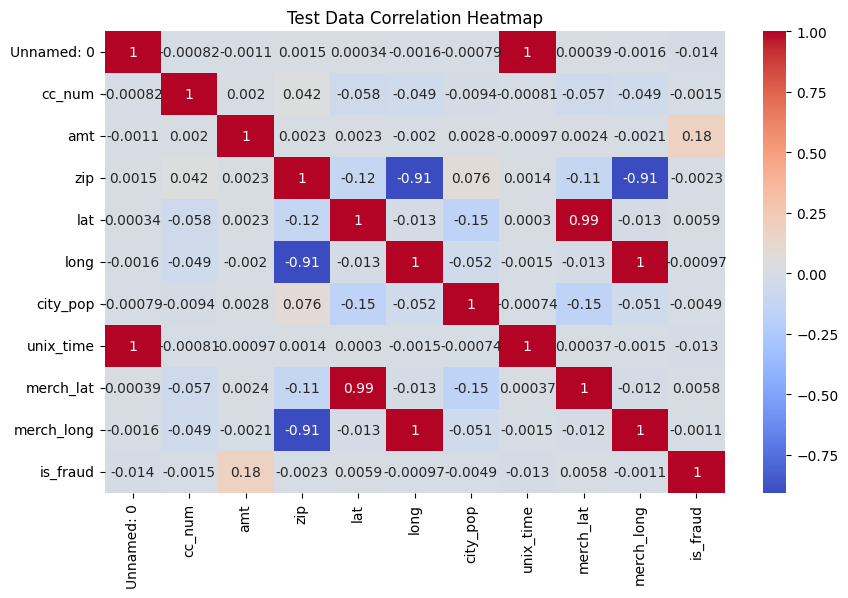

In [ ]:
# Task 5: Check the correlation between numerical features and plot heatmap in both datasets.

numeric_train = train_df.select_dtypes(include=['number'])
numeric_test = test_df.select_dtypes(include=['number'])

corr_train = numeric_train.corr()
corr_test = numeric_test.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr_train, annot=True, cmap='coolwarm')
plt.title("Train Data Correlation Heatmap")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(corr_test, annot=True, cmap='coolwarm')
plt.title("Test Data Correlation Heatmap")
plt.show()


##### Key observation:

1. Feature Selection:

- `Unnamed: 0` can likely be dropped (high correlation with `unix_time`).
- `long`, `lat`, `merch_long`, and `merch_lat` are highly correlated.

2.	Fraud Prediction Insight:

- Since `amt `shows some correlation with fraud, we should investigate transactions with unusually high values.

- Other features individually do not show strong correlation, so combining features (feature engineering) or using non-linear models like Random Forest, XGBoost, or Neural Networks might improve fraud detection.


In [ ]:
# Task 6: Drop unnecessary columns like 'Unnamed: 0'.
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# Task 7: Handle missing values
print("Missing values in train:", train_df.isnull().sum().sum())
print("Missing values in test:", test_df.isnull().sum().sum())

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

Missing values in train: 0
Missing values in test: 0


In [ ]:
# Task 8: Check for duplicate entries in both datasets.
print("Duplicate entries in train:", train_df.duplicated().sum())
print("Duplicate entries in test:", test_df.duplicated().sum())

Duplicate entries in train: 0
Duplicate entries in test: 0


In [ ]:
# Task 9: Convert dob,trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column.

for df in [train_df, test_df]:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')  # Convert DOB
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')  # Convert transaction time
    df['trans_date'] = df['trans_date_trans_time'].dt.date  # Extract only the date

# Calculate age
train_df['age'] = (pd.Timestamp.today() - train_df['dob']).dt.days // 365
test_df['age'] = (pd.Timestamp.today() - test_df['dob']).dt.days // 365

# Define age group bins
bins = [0, 18, 30, 45, 60, 100]
labels = ['Under 18', '18-30', '31-45', '46-60', '60+']

# Assign age groups
train_df['age_group'] = pd.cut(train_df['age'], bins=bins, labels=labels, right=False)
test_df['age_group'] = pd.cut(test_df['age'], bins=bins, labels=labels, right=False)


In [ ]:
train_df.head()
test_df.head()  

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,age,age_group
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,57,46-60
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,35,31-45
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,54,46-60
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,37,31-45
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,69,60+


In [ ]:
new_column_names = {
    'cc_num': 'card_number',
    'amt': 'amount',
    'first': 'first_name',
    'last': 'last_name',
    'zip': 'zip_code',
    'lat': 'latitude',
    'long': 'longitude',
    'city_pop': 'city_population',
    'trans_num': 'transaction_id',
    'unix_time': 'unix_timestamp',
    'merch_lat': 'merchant_latitude',
    'merch_long': 'merchant_longitude',
}

train_df.rename(columns=new_column_names, inplace=True)
test_df.rename(columns=new_column_names, inplace=True)


In [ ]:
train_columns = list(train_df.columns)
train_columns


['trans_date_trans_time',
 'card_number',
 'merchant',
 'category',
 'amount',
 'first_name',
 'last_name',
 'gender',
 'street',
 'city',
 'state',
 'zip_code',
 'latitude',
 'longitude',
 'city_population',
 'job',
 'dob',
 'transaction_id',
 'unix_timestamp',
 'merchant_latitude',
 'merchant_longitude',
 'is_fraud',
 'trans_date',
 'age',
 'age_group']

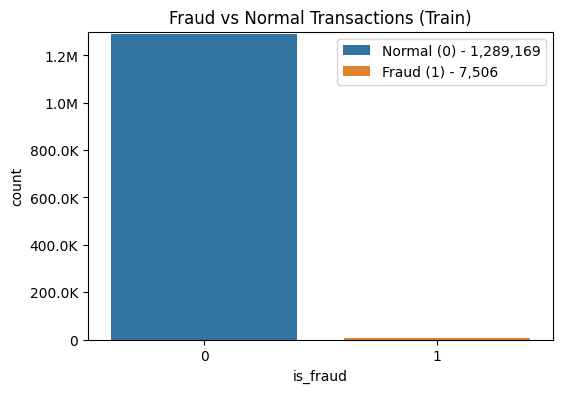

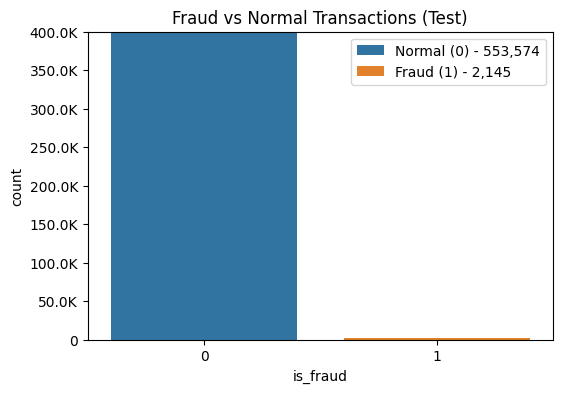

In [ ]:
# Task 10: Check the Fraud and the Normal transaction numbers for test and train datasets

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick   

# Count Fraud and Normal Transactions
train_counts = train_df['is_fraud'].value_counts()
test_counts = test_df['is_fraud'].value_counts()

def format_millions(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    return f'{int(x)}'   

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='is_fraud', data=train_df, hue='is_fraud')
plt.title("Fraud vs Normal Transactions (Train)")
plt.ylim(0, 1_300_000)   
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_millions))   

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'Normal (0) - {train_counts[0]:,}', f'Fraud (1) - {train_counts[1]:,}'])

plt.show()

# Test Set Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='is_fraud', data=test_df, hue='is_fraud')
plt.title("Fraud vs Normal Transactions (Test)")
plt.ylim(0, 400_000)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_millions))   

 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'Normal (0) - {test_counts[0]:,}', f'Fraud (1) - {test_counts[1]:,}'])

plt.show()


In [ ]:
# Task 11: Merge the train and test datasets into a single dataset for further analysis
merged_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
print("Merged Dataset Shape:\n", merged_df.shape)

merged_df.head()

Merged Dataset Shape:
 (1852394, 25)


,trans_date_trans_time,card_number,merchant,category,amount,first_name,last_name,gender,street,city,...,job,dob,transaction_id,unix_timestamp,merchant_latitude,merchant_longitude,is_fraud,trans_date,age,age_group
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,37,31-45
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,46,46-60
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,63,60+
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,58,46-60
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,39,31-45


Fraud Counts:
 is_fraud
0    1842743
1       9651
Name: count, dtype: int64


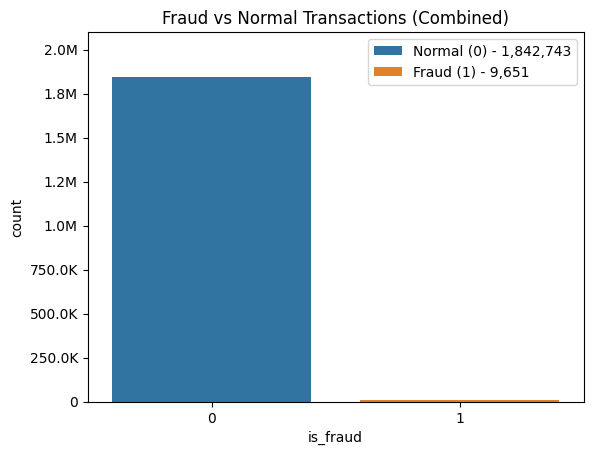

In [ ]:
fraud_counts = merged_df['is_fraud'].value_counts()
print("Fraud Counts:\n", fraud_counts)
 
def format_millions(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    return f'{int(x)}'   

# Plot fraud distribution
ax = sns.countplot(x='is_fraud', data=merged_df, hue='is_fraud')
plt.title("Fraud vs Normal Transactions (Combined)")
plt.ylim(0, 2_100_000)  
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_millions))  

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'Normal (0) - {fraud_counts[0]:,}', f'Fraud (1) - {fraud_counts[1]:,}'])

plt.show()

# Activity 5: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1. Counting Plot of Transactions by Top 10 Categories

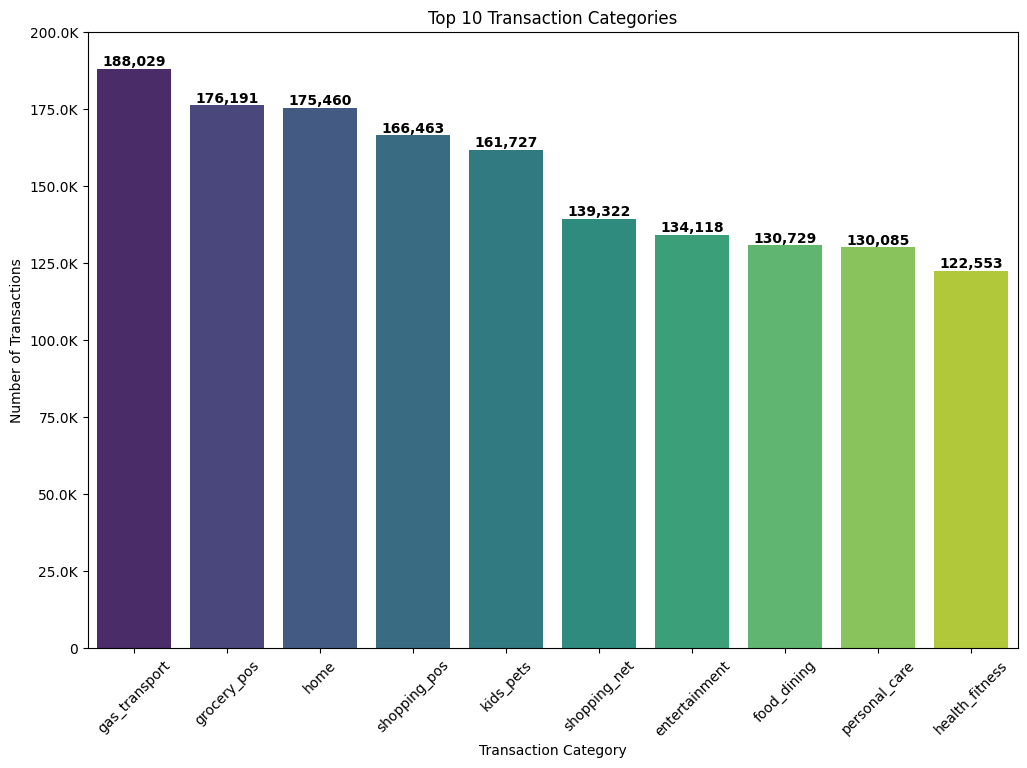

In [ ]:
# Task 1: Visualize the top 10 transaction categories in the merged dataset

plt.figure(figsize=(12,8))

# Function to format y-axis labels (e.g., 1000000 → 1M)
def format_millions(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    return f'{int(x)}'   

top_categories = merged_df['category'].value_counts().nlargest(10)

ax = sns.barplot(x=top_categories.index, hue=top_categories.index, y=top_categories.values, palette='viridis')

plt.xticks(rotation=45)
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_millions))  
plt.title('Top 10 Transaction Categories')
plt.ylim(0, 200000)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


#### Key Insights:

**The Top 10 Transaction Categories highlight key spending patterns among users.**

- Gas and transportation lead with 188,029 transactions, indicating frequent fuel and travel expenses. 
- Grocery (176,191) and home-related (175,460) expenses follow closely, reflecting essential household spending. 
- Shopping (both POS and online) and kids/pets categories also show significant activity, suggesting discretionary spending trends. 
- Entertainment, food & dining, personal care, and health & fitness transactions range between 122,553 and 134,118, showcasing regular expenses on lifestyle, well-being, and leisure. 

This distribution suggests a balanced mix of necessity and discretionary spending among users.

### 2. Counting Plot of Transactions by Gender


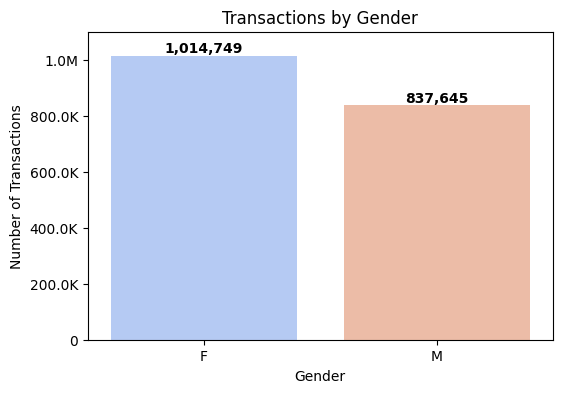

In [ ]:
# Task 2: Visualize the transaction of gender in the merged dataset

plt.figure(figsize=(6,4))

# Function to format y-axis labels (e.g., 1000000 → 1M)
def format_millions(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    return f'{int(x)}' 

ax = sns.countplot(x='gender', data=merged_df, hue='gender', palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_millions))  
plt.title('Transactions by Gender')
plt.ylim(0, 1100000)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


#### Key Insights:

- The transaction data shows a higher number of transactions from category F (1,014,749 transactions) compared to M (837,645 transactions). 
- This suggests that individuals in category F engage in more transactions overall. 
- The difference may indicate varying spending patterns, purchasing behaviors, or financial activity levels between the two categories. 
- Further analysis could explore whether this trend holds across different transaction types, amounts, or merchant categories.

### 3. Counting Plot of Transactions by Top 10 Merchants

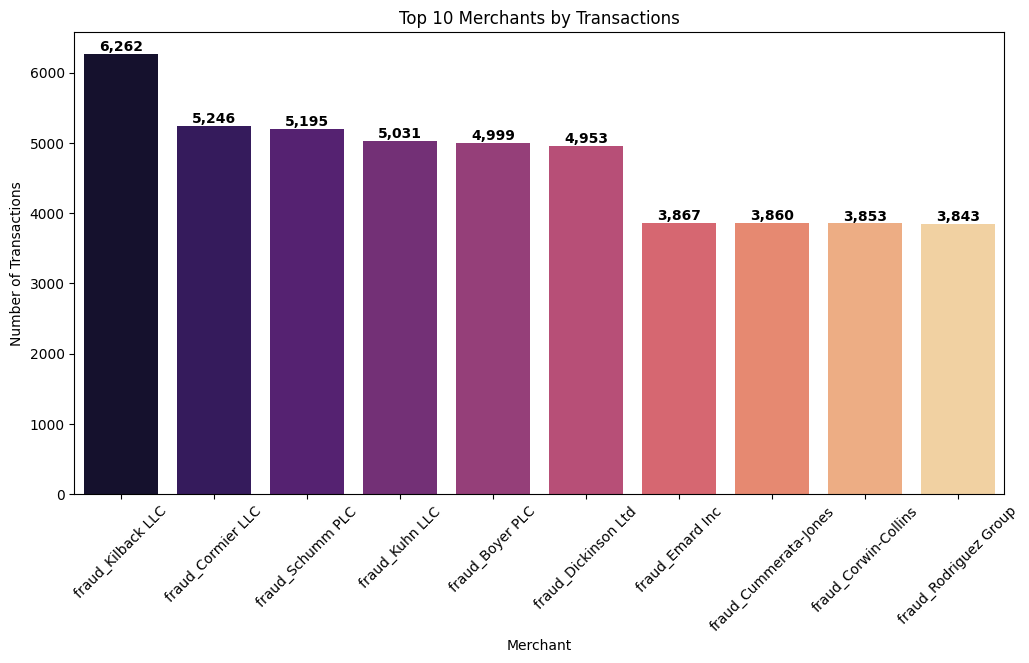

In [ ]:
# Task 3: Visualize the transactions by top 10 Merchants in the merged dataset 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Get top 10 merchants by transaction count
top_merchants = merged_df['merchant'].value_counts().nlargest(10)

# Define ax explicitly
ax = sns.barplot(x=top_merchants.index, hue=top_merchants.index, y=top_merchants.values, palette='magma')

plt.xticks(rotation=45)
plt.xlabel('Merchant')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Merchants by Transactions')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


#### Key Insights:

- The high concentration of fraud among specific merchants suggests the need for enhanced security measures, stricter monitoring, and fraud detection systems to mitigate financial risks. 
- Further investigation could uncover common patterns in these fraudulent transactions.

### 4. Box Plot of Transaction Amount by Category

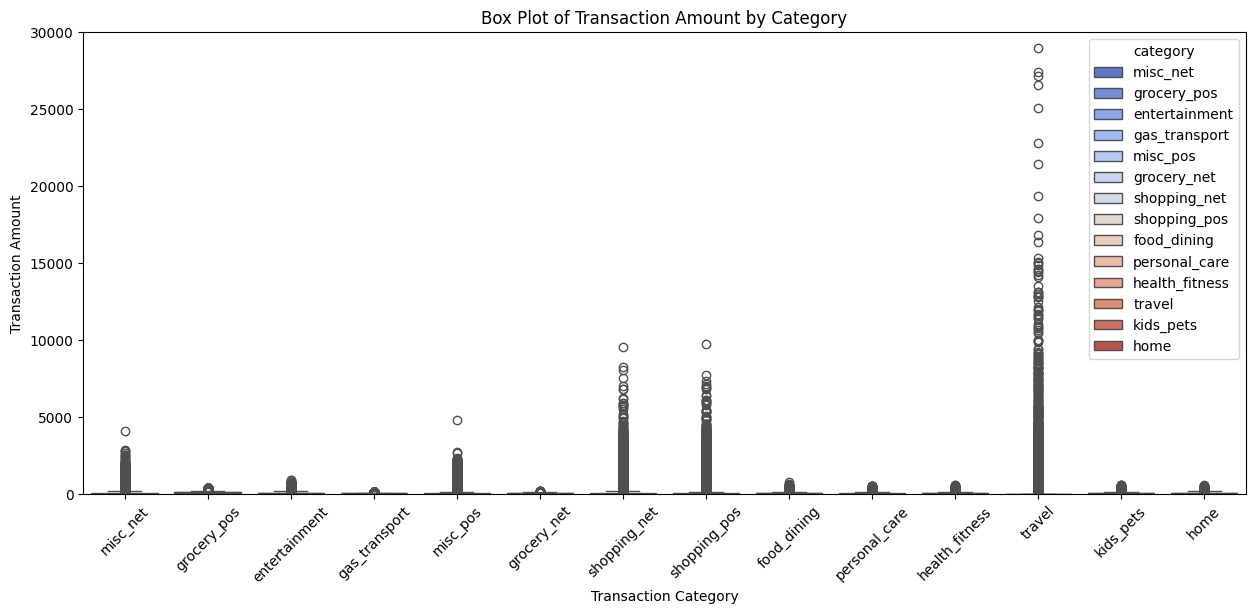

In [ ]:
#Task 4: Visualize the  Box plot of transaction amount by category 

category_df = merged_df['category']
category_amount = merged_df['amount']

plt.figure(figsize=(15,6))
sns.boxplot(x=category_df, y=category_amount, hue=category_df, data=merged_df, palette='coolwarm', legend=True)
plt.xticks(rotation=45)
plt.xlabel('Transaction Category')
plt.ylabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount by Category')
plt.ylim(0, 30000)
plt.show()


#### Key Insights:

1. **Most Outliers in Shopping & Miscellaneous.**

- Shopping (POS & Net) and Miscellaneous transactions have the highest number of outliers (~16k transactions each).
- This suggests high spending variability, with customers making unusually large or small transactions.

2. **Travel has the Highest Max Outlier**.

- The largest outlier is $28,948.90 in the travel category, which indicates either expensive bookings or fraud.
- Travel transactions naturally have a wider range of amounts, leading to extreme outliers.

3. **Gas & Transport has the Smallest Outliers**

- The gas/transport category has the lowest max outlier ($154.03) and the smallest min outlier ($5.53).
- This suggests that most gas-related transactions are relatively stable, with fewer extreme outliers.

4. **Fraud or Unusual Transactions?**

- Categories with frequent high-value outliers (e.g., shopping, travel, entertainment) could indicate fraudulent activity or unusual spending patterns.
- Businesses and banks often monitor these categories to detect suspicious transactions.

### 5. Histogram of Transaction Amount

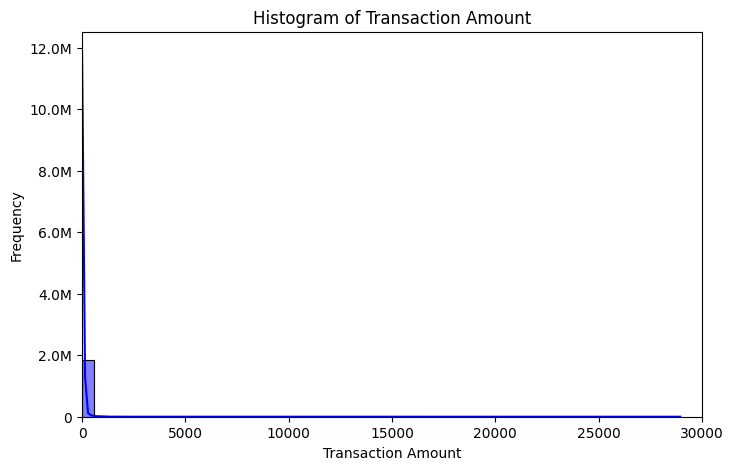

In [ ]:
# Task 5: Visualize the histogram of transaction amount in the merged dataset

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.figure(figsize=(8,5))

format_millions = lambda x, pos: f'{x/1_000_000:.1f}M' if x >= 1_000_000 else (f'{x/1_000:.1f}K' if x >= 1_000 else f'{int(x)}')

ax = sns.histplot(merged_df['amount'], bins=50, kde=True, color='blue')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amount')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_millions))

plt.xlim(0, 30000)
plt.show()


#### Key Insights:

1. Most transactions are of low value.

- The highest frequency of transactions occurs at the lower end of the amount range (near $0 to $500).
- This suggests that most transactions involve small purchases like groceries, gas, or dining.

2. Few high-value transactions.

- The histogram shows a steep decline in frequency as the transaction amount increases.
- Very few transactions exceed $10,000, indicating that large purchases are rare.

3. Right-Skewed Distribution.

- The distribution is right-skewed, meaning there are more small transactions and fewer large transactions.
- This pattern is common in consumer spending, where most purchases are of low to moderate value.

4. Possible Outliers in the Higher Range.

- There are some transactions in the $20,000 - $30,000 range, which could be outliers.
- These could be luxury expenses, business transactions, or even fraudulent activities.

### 6. Top Categories of Fraudulent Transactions


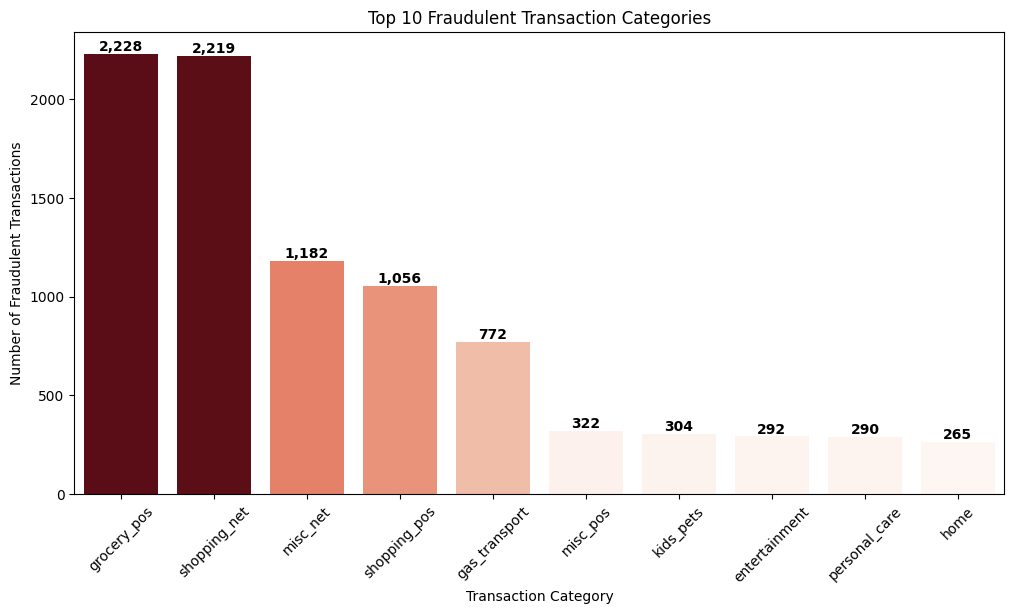

In [ ]:
# Task 6: Visualize the top 10 fraudulent transaction categories in the merged dataset

final_fraud_df = merged_df[merged_df['is_fraud'] == 1]
top_fraud_categories = final_fraud_df['category'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_fraud_categories.index, y=top_fraud_categories.values, hue=top_fraud_categories, palette='Reds' , legend=False)
plt.xticks(rotation=45)
plt.xlabel('Transaction Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Top 10 Fraudulent Transaction Categories')


for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.show()


#### Key Insights:

 - The top categories reveals that grocery_pos (2,228 fraud cases) and shopping_net (2,219 fraud cases) are the most targeted, likely due to their high transaction volumes and online nature. 
 - Shopping_pos (1,056 cases) and gas_transport (772 cases) also show significant fraud activity, suggesting fraudsters target everyday spending categories. 
 - Other categories like home (265 cases), entertainment (292 cases), and personal_care (290 cases) indicate moderate fraud risk, while health_fitness (185 cases) and food_dining (205 cases) have relatively lower fraud rates. 
 
 This suggests fraud is more common in high-transaction-volume and online-based categories.

### 7. State-wise Analysis of Fraudulent Transactions

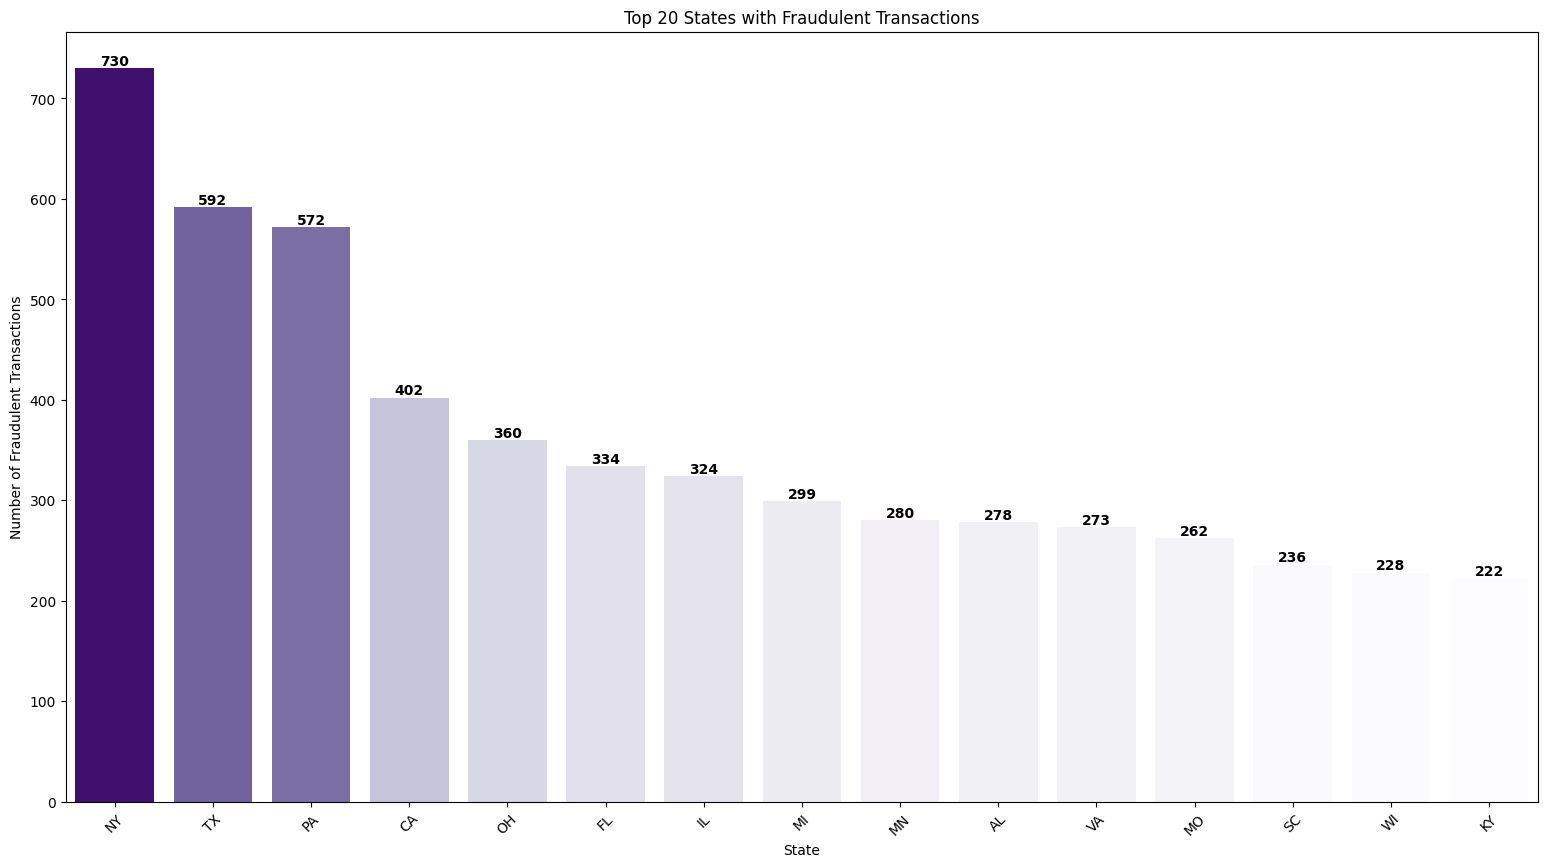

In [ ]:
# Task 7: Visualize the top 20 states with fraudulent transactions in the merged dataset

plt.figure(figsize=(19,10))
fraud_transactions = merged_df[merged_df['is_fraud'] == 1]
state_fraud = fraud_transactions['state'].value_counts().nlargest(15)

ax = sns.barplot(x=state_fraud.index, y=state_fraud.values, hue=state_fraud, palette='Purples' , legend=False)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Top 20 States with Fraudulent Transactions')
 
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()) , 
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.show()


#### Key Insights 

- **Urban & High-Population States:** States like NY, TX, CA, and FL, which have large populations and high financial activity, report more fraudulent transactions.
- **Midwest & Southern States Also Affected:** Fraud cases are also notable in Ohio (OH), Illinois (IL), Michigan (MI), and Alabama (AL), suggesting that fraud is widespread across different regions.
- **Relative Drop in Lower States:** The gap between the top few states and the lower ones (e.g., Kentucky (KY) with 222 cases) suggests regional variations in fraud prevalence.


 Fraudulent transactions appear to be more concentrated in highly urbanized and economically active states. These trends could indicate higher fraud risks in states with more digital transactions or financial activities.

### 8. City-wise Analysis of Fraudulent Transactions

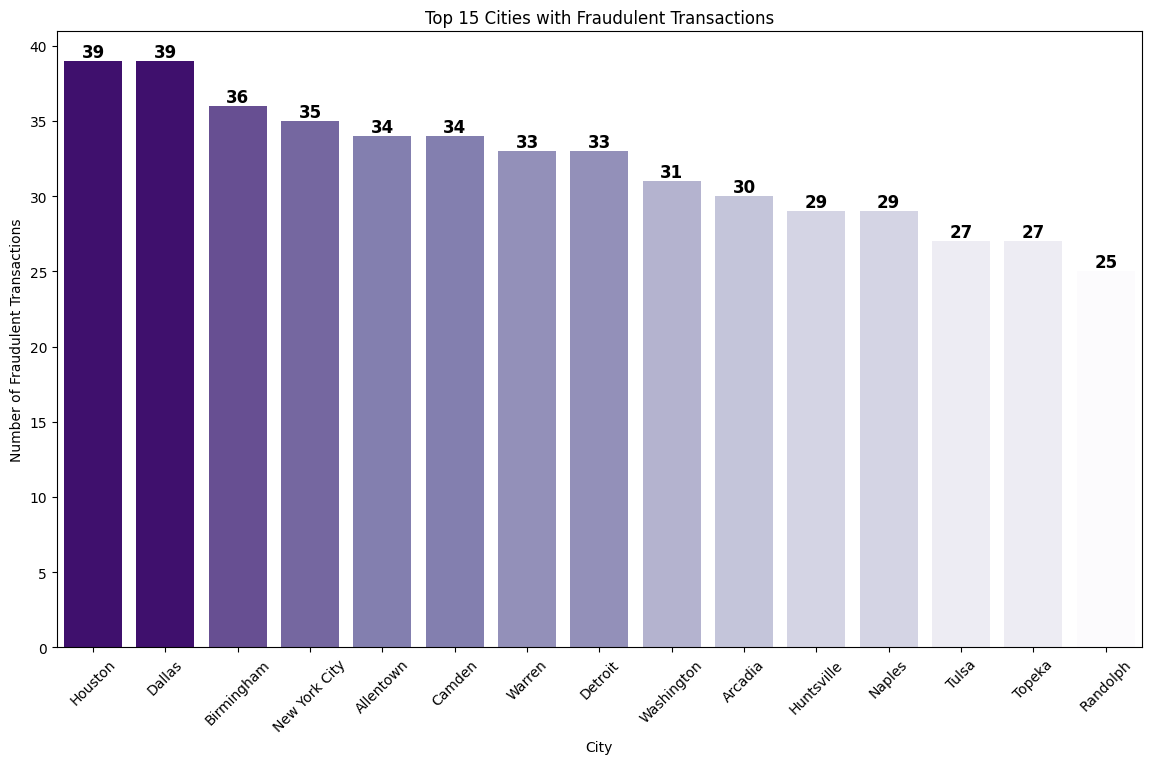

In [ ]:
# Task 8: Visualize the top 15 states with fraudulent transactions in the merged dataset

plt.figure(figsize=(14,8))
fraud_transactions = merged_df[merged_df['is_fraud'] == 1]
city_fraud = fraud_transactions['city'].value_counts().nlargest(15)

ax = sns.barplot(x=city_fraud.index, y=city_fraud.values, hue=city_fraud, palette='Purples' , legend=False)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Top 15 Cities with Fraudulent Transactions')
 
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()) , 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()


#### Key Insights:

- The data reveals that Houston and Dallas (both 39 cases) have the highest number of fraudulent transactions, followed closely by Birmingham (36) and New York City (35).
- Larger cities tend to have higher fraud cases due to higher transaction volumes, but smaller cities are also at risk, possibly due to lower fraud detection mechanisms.


### 9. Number of Credit Card Frauds by Job

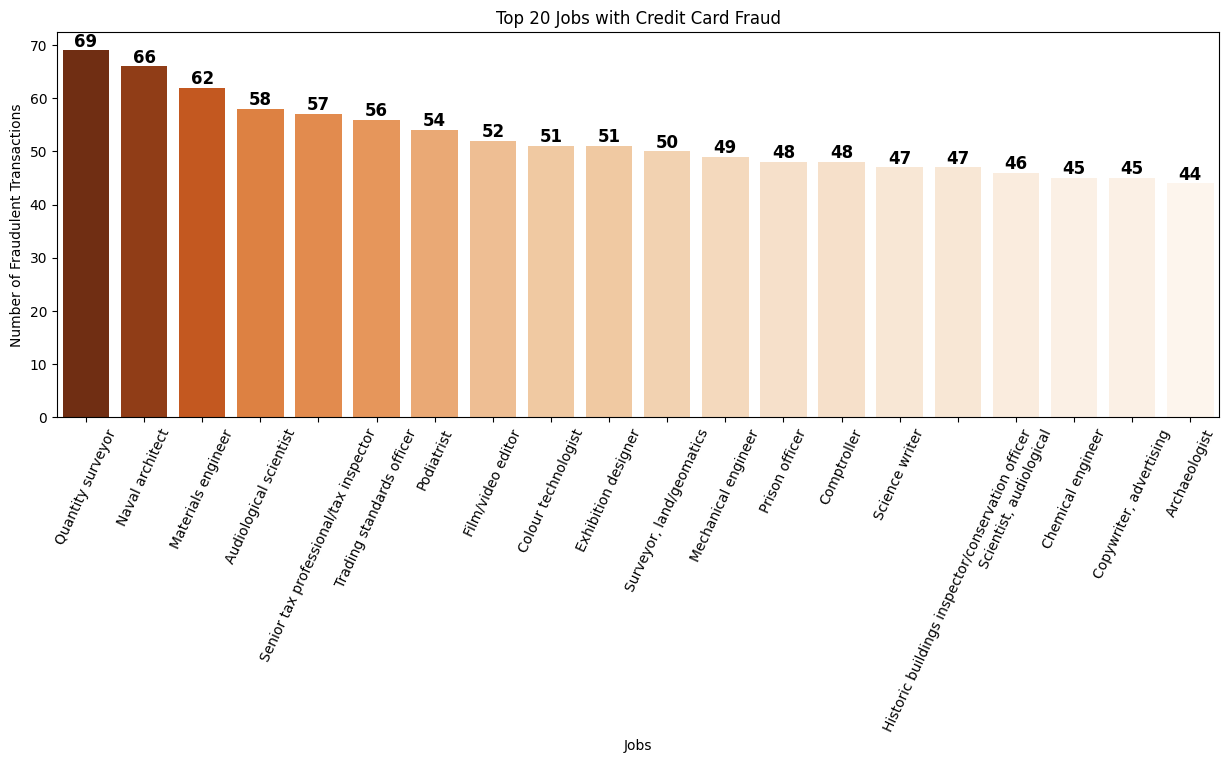

In [ ]:
# Task 9: Visualize the top 20 jobs with fraudulent transactions in the merged dataset

plt.figure(figsize=(15,5))
fraud_transactions = merged_df[merged_df['is_fraud'] == 1] 
top_jobs = fraud_transactions['job'].value_counts().nlargest(20)

ax = sns.barplot(x=top_jobs.index, y=top_jobs.values, hue=top_jobs , palette='Oranges', legend=False)
plt.xticks(rotation=65)
plt.xlabel('Jobs')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Top 20 Jobs with Credit Card Fraud')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()) , 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.show()


#### Key Insights:

- Quantity Surveyors (69) are the most common professionals in this list, likely due to high demand in construction and real estate industries.
- Naval Architects (66) and Materials Engineers (62) indicate a strong presence of specialized engineering fields.
- Niche professions like Audiological Scientists (58) and Podiatrists (54) have moderate representation, reflecting steady demand in healthcare.
- Creative fields such as Film/Video Editors (52) and Exhibition Designers (51) show a reasonable workforce presence, indicating ongoing opportunities in media and design.
- Senior Tax Professionals (57) and Trading Standards Officers (56) reflect the importance of regulatory and financial oversight roles.

#### Conclusion:
- The list covers a mix of engineering, healthcare, creative, and regulatory roles. 
- Professions with technical expertise and specialized skills (e.g., surveyors, engineers, and tax professionals) have higher representation, reflecting their steady demand across industries.

### 10. Number of Credit Card Frauds by Age Groups

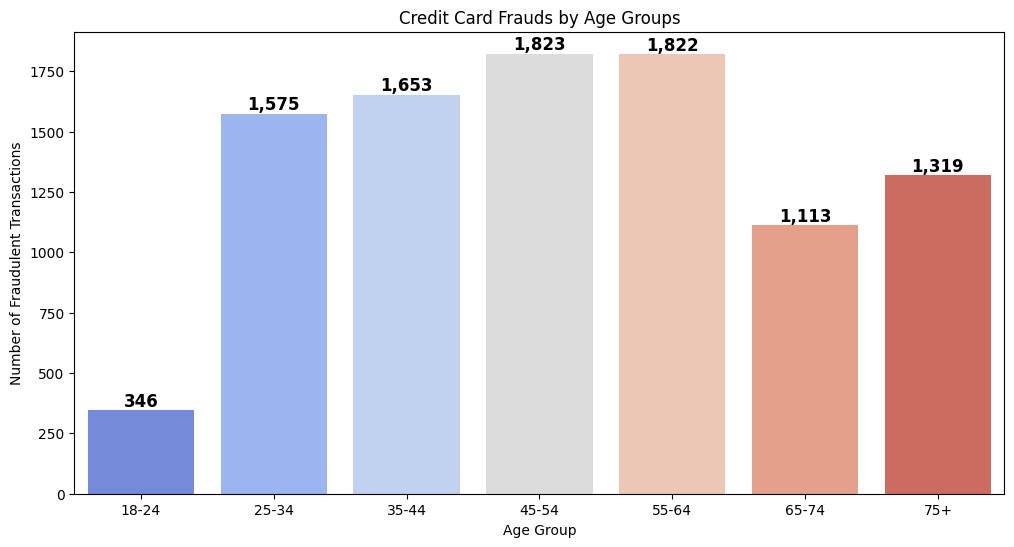

In [ ]:
# Task 10: Visualize the age groups with fraudulent transactions in the merged dataset

merged_df.loc[:, 'age'] = (pd.to_datetime('2025-01-01') - merged_df['dob']).dt.days // 365

# Define age groups
age_bins = [18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Assign age groups properly using .loc
fraud_transactions = merged_df[merged_df['is_fraud'] == 1] 
fraud_transactions.loc[:, 'age_group'] = pd.cut(fraud_transactions['age'], bins=age_bins, labels=age_labels)

 
plt.figure(figsize=(12,6))
ax = sns.countplot(x='age_group', data=fraud_transactions, hue='age_group', palette='coolwarm', legend=False, order=age_labels)
plt.xlabel('Age Group')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Credit Card Frauds by Age Groups')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()) , 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()


#### Key Insights  

#### Fraud Activity by Age Group.

- **Middle-aged individuals (45-54 & 55-64)** have the highest fraud activity, each exceeding 1,800 <br />cases. This may indicate that people in this age group are more financially active, making them frequent targets or perpetrators.

- **Fraud cases decrease among younger individuals (18-24: 346)**, possibly due to lower financial <br />engagement or better digital security awareness.

- **The 35-44 and 25-34 age groups also show significant fraud cases (1653 & 1575)**, <br /> suggesting active financial participation but with slightly lower fraud risks than older demographics.

- **Seniors (75+ and 65-74)** still face substantial fraud cases (1319 & 1113), <br />likely due to susceptibility to scams or lack of digital literacy.

Fraud activity is highest among middle-aged individuals (45-64), likely due to higher financial transactions. <br />Seniors (65+) remain vulnerable, while younger individuals (18-24) experience the least fraud.

### 11. Number of Credit Card Frauds by Gender

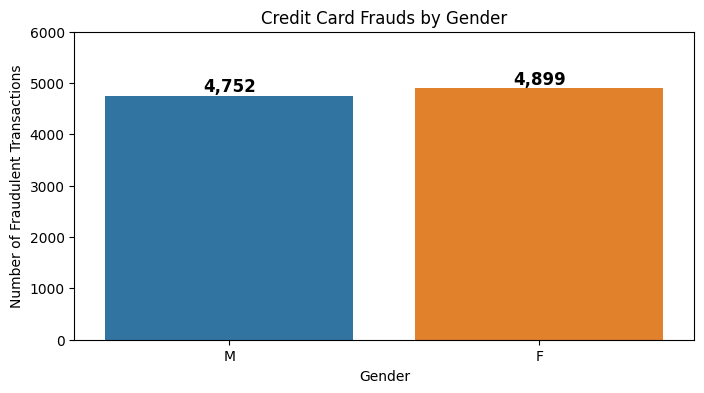

In [ ]:
# Task 11: Vitualize the number of Credit Card Frauds by Gender in merged dataset

plt.figure(figsize=(8,4))
fraud_transactions = merged_df[merged_df['is_fraud'] == 1]
fraud_by_gender = fraud_transactions['gender'] 

ax = sns.countplot(x=fraud_by_gender, data=fraud_transactions, palette='tab10', hue=fraud_by_gender, legend=False)
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Credit Card Frauds by Gender')
plt.ylim(0, 6000)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()) , 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.show()

#### Key Insights:

- **Fraud cases are nearly equal between females (4,899) and males (4,752)**, indicating that both genders are targeted or involved in fraudulent activities at similar rates.

- **Females have a slightly higher fraud count**, suggesting potential differences in spending patterns, financial behavior, or susceptibility to certain types of fraud.

Both men and women experience fraud at comparable rates, with a slight edge towards females. Fraud prevention <br />measures should be  gender-neutral and focus on behavioral patterns rather than demographics.

### 12: Number of Credit Card Frauds by Year

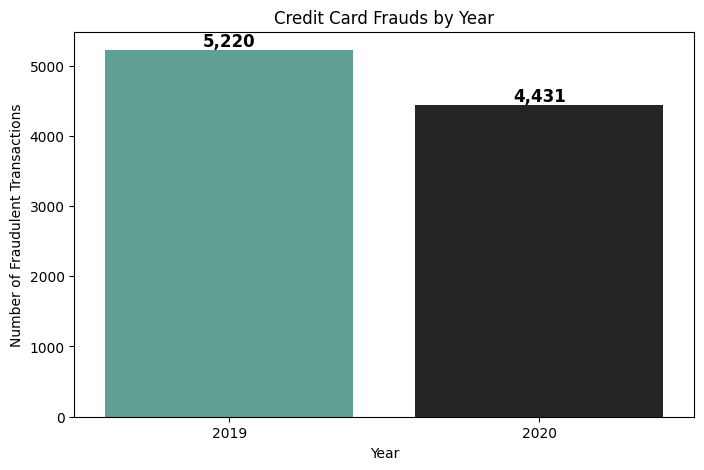

In [ ]:
# Task 12: Visualize the number of Credit Card Frauds by Year in merged dataset

fraud_transactions = merged_df[merged_df['is_fraud'] == 1].copy()
fraud_transactions['trans_date_trans_time'] = pd.to_datetime(fraud_transactions['trans_date_trans_time'])

# Extract the year
fraud_transactions['trans_year'] = fraud_transactions['trans_date_trans_time'].dt.year

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='trans_year', data=fraud_transactions, palette='dark:#5A9_r', hue='trans_year', legend=False)

plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Credit Card Frauds by Year')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()

#### Key Insight.

- The analysis of fraudulent transactions by year shows that fraudulent activities were higher in 2019 (5,220 cases) compared to 2020 (4,431 cases). 
<br />This indicates a 15% decrease in fraud cases from 2019 to 2020.

#### Possible Insights:

- The decline in fraud cases in 2020 could be due to improved security measures by financial institutions.
- The COVID-19 pandemic may have impacted transaction behaviors, possibly reducing in-person fraud opportunities.
- Regulatory changes or increased fraud awareness among consumers might have contributed to the drop.

### 13 Fraud Analysis by Latitude

### Finding distance from customer location to merchant location in degrees latitude and degrees longitude

In [ ]:
fraud_transactions = merged_df[merged_df['is_fraud'] == 1].copy()

fraud_transactions['latitudinal_distance'] = abs(round(fraud_transactions['merchant_latitude']-fraud_transactions['latitude'],3))
fraud_transactions['longitudinal_distance'] = abs(round(fraud_transactions['merchant_longitude']-fraud_transactions['longitude'],3))

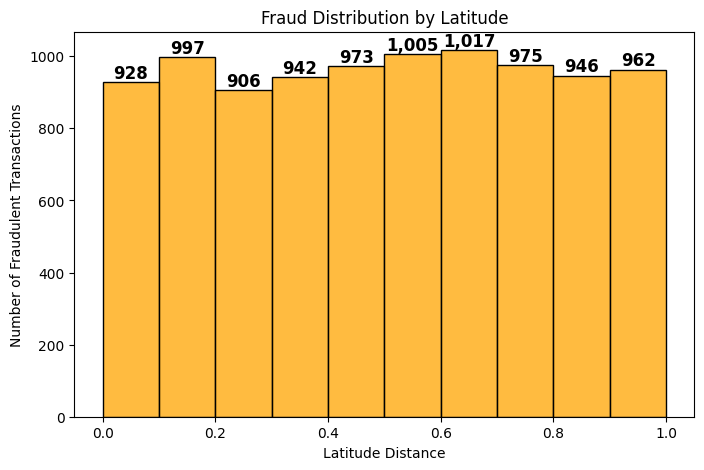

In [ ]:
# Task 13: Visualize the latitudinal distance of fraudulent transactions in merged dataset

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
ax = sns.histplot(fraud_transactions['latitudinal_distance'], bins=10, color='orange', edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xlabel('Latitude Distance')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraud Distribution by Latitude')
plt.show()


### 14: Fraud Analysis by Longitude Distance

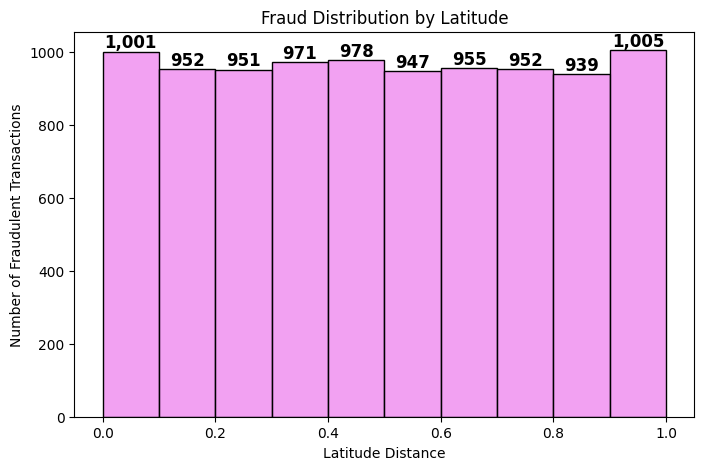

In [ ]:
# Task 14: Visualize the longitudinal distance of fraudulent transactions in merged dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ax = sns.histplot(fraud_transactions['longitudinal_distance'], bins=10, color='violet', edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Format numbers with commas
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.xlabel('Latitude Distance')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraud Distribution by Latitude')
plt.show()


In [ ]:
fraud_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9651 entries, 2449 to 1814246
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  9651 non-null   datetime64[ns]
 1   card_number            9651 non-null   int64         
 2   merchant               9651 non-null   object        
 3   category               9651 non-null   object        
 4   amount                 9651 non-null   float64       
 5   first_name             9651 non-null   object        
 6   last_name              9651 non-null   object        
 7   gender                 9651 non-null   object        
 8   street                 9651 non-null   object        
 9   city                   9651 non-null   object        
 10  state                  9651 non-null   object        
 11  zip_code               9651 non-null   int64         
 12  latitude               9651 non-null   float64       
 13  lo

# Activity 6: Feature Engineering

### Removing features that are redundant, non-informative, or potentially misleading and too many categories can add noise.

In [ ]:
# Task 1: seperating trans_date_trans_time column into year, month, day, hour, and dayofweek in merged dataset  

merged_df['trans_date_trans_time'] = pd.to_datetime(merged_df['trans_date_trans_time'])

merged_df['trans_year'] = merged_df['trans_date_trans_time'].dt.year
merged_df['trans_month'] = merged_df['trans_date_trans_time'].dt.month
merged_df['trans_day'] = merged_df['trans_date_trans_time'].dt.day
merged_df['trans_hour'] = merged_df['trans_date_trans_time'].dt.hour
merged_df['trans_dayofweek'] = merged_df['trans_date_trans_time'].dt.dayofweek

In [ ]:
# Task 2: creating a combined dataset of  merged train and test datasets 
combined_df = merged_df.copy()

In [ ]:
# Task 3: Drop unnecessary columns from the combined dataset
print("Combined Dataset Column info:")
combined_df = combined_df.drop(columns=['dob', 'first_name', 'last_name', 'street', 'city', 'state', 'zip_code', 'transaction_id', 'age_group', 'trans_date_trans_time', 'trans_day', 'trans_hour', 'trans_date', 'trans_dayofweek', 'trans_year', 'unix_timestamp'], errors='ignore')
combined_df.info()

Combined Dataset Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   card_number         int64  
 1   merchant            object 
 2   category            object 
 3   amount              float64
 4   gender              object 
 5   latitude            float64
 6   longitude           float64
 7   city_population     int64  
 8   job                 object 
 9   merchant_latitude   float64
 10  merchant_longitude  float64
 11  is_fraud            int64  
 12  age                 int64  
 13  trans_month         int32  
dtypes: float64(5), int32(1), int64(4), object(4)
memory usage: 190.8+ MB


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'gender' and 'category'
if 'gender' in combined_df.columns:
    combined_df['gender'] = label_encoder.fit_transform(combined_df['gender'])

if 'category' in combined_df.columns:
    combined_df['category'] = label_encoder.fit_transform(combined_df['category'])

# Show the processed data
print("Processed Dataset Sample:")
combined_df.head()

Processed Dataset Sample:


,card_number,merchant,category,amount,gender,latitude,longitude,city_population,job,merchant_latitude,merchant_longitude,is_fraud,age,trans_month
0,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,0,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,37,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,0,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,46,1
2,38859492057661,fraud_Lind-Buckridge,0,220.11,1,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,63,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,1,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,58,1
4,375534208663984,fraud_Keeling-Crist,9,41.96,1,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,39,1


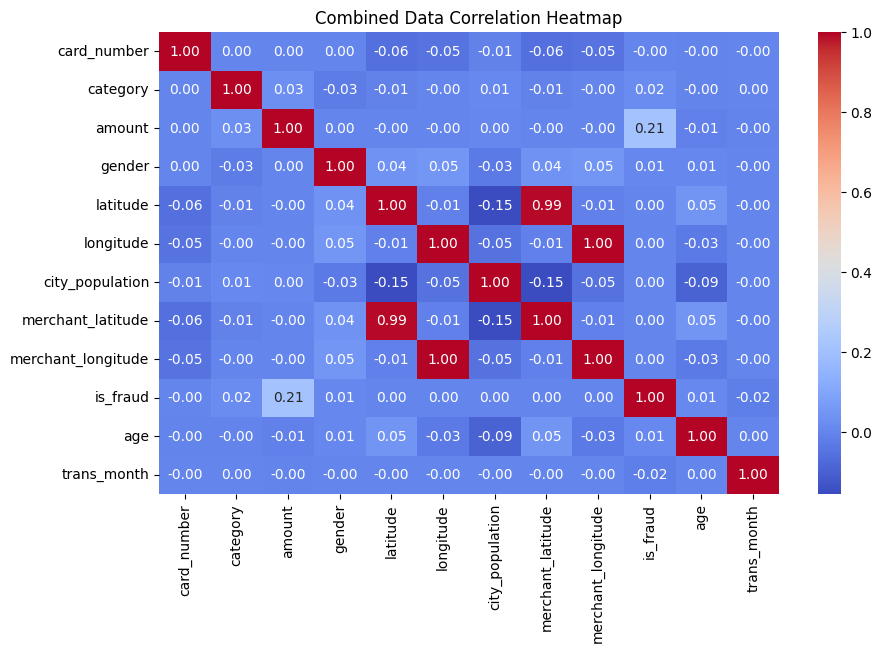

 Dropped 4 highly correlated features:
 {'latitude', 'merchant_latitude', 'longitude', 'merchant_longitude'}


In [ ]:
# Task 5: dropping highly correlated features in the combined dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_train = combined_df.select_dtypes(include=['number'])
 
# Compute correlation matrices
corr_train = numeric_train.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Combined Data Correlation Heatmap")
plt.show()
 
threshold = 0.85

high_corr_features = set()
for col in corr_train.columns:
    for idx in corr_train.index:
        if idx != col and corr_train.at[idx, col] > threshold:
            high_corr_features.add(idx)

combined_final = combined_df.drop(columns=high_corr_features)

print(f" Dropped {len(high_corr_features)} highly correlated features:\n", high_corr_features)


In [ ]:
# Task 6: Label Encoding for categorical features in the combined dataset

categorical_cols = combined_final.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for col in categorical_cols:
    combined_final[col] = label_encoder.fit_transform(combined_final[col])

print("Categorical Features Encoded:", categorical_cols)
print("Combined dataset Processed Shape:", combined_final.shape)

Categorical Features Encoded: ['merchant', 'job']
Combined dataset Processed Shape: (1852394, 10)


In [ ]:
# Task 7:  Normalize numerical features to improve model performance

from sklearn.preprocessing import MinMaxScaler

numeric_cols = combined_final.select_dtypes(include=['number']).columns.tolist()
excluded_cols = []

for col in numeric_cols:
    if combined_final[col].nunique() <= 10:
        excluded_cols.append(col)
    if 'id' in col.lower() or 'label' in col.lower() or 'fraud' in col.lower():
        excluded_cols.append(col)

scale_cols = [col for col in numeric_cols if col not in excluded_cols]

scaler = MinMaxScaler()
combined_final[scale_cols] = scaler.fit_transform(combined_final[scale_cols])

print("Columns scaled:", scale_cols)
print("Columns excluded from scaling:", excluded_cols)

combined_final.info() 

Columns scaled: ['card_number', 'merchant', 'category', 'amount', 'city_population', 'job', 'age', 'trans_month']
Columns excluded from scaling: ['gender', 'is_fraud', 'is_fraud']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   card_number      float64
 1   merchant         float64
 2   category         float64
 3   amount           float64
 4   gender           int64  
 5   city_population  float64
 6   job              float64
 7   is_fraud         int64  
 8   age              float64
 9   trans_month      float64
dtypes: float64(8), int64(2)
memory usage: 141.3 MB


In [ ]:
# Task 8: Save the final dataset
combined_final.to_csv("Capstone_Dataset.csv", index=False)

# Activity 7: Model Training and Evaluation


In [ ]:
# Task 1: Split the data into training and testing sets.

from sklearn.model_selection import train_test_split

X = combined_final.drop(columns=['is_fraud'])
Y = combined_final['is_fraud']  

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)


Training set: (1481915, 9) (1481915,)
Testing set: (370479, 9) (370479,)


In [ ]:
combined_final.head()

,card_number,merchant,category,amount,gender,city_population,job,is_fraud,age,trans_month
0,5.414540e-04,0.742775,0.615385,0.000137,0,0.001194,0.750000,0,0.2125,0.0
1,1.141762e-07,0.348266,0.307692,0.003670,0,0.000043,0.868952,0,0.3250,0.0
2,7.771712e-06,0.563584,0.000000,0.007569,1,0.001421,0.620968,0,0.5375,0.0
3,7.078903e-04,0.520231,0.153846,0.001520,1,0.000659,0.665323,0,0.4750,0.0
4,7.520988e-05,0.429191,0.692308,0.001415,1,0.000026,0.233871,0,0.2375,0.0


Accuracy: 0.9948

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368549
           1       0.00      0.00      0.00      1930

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



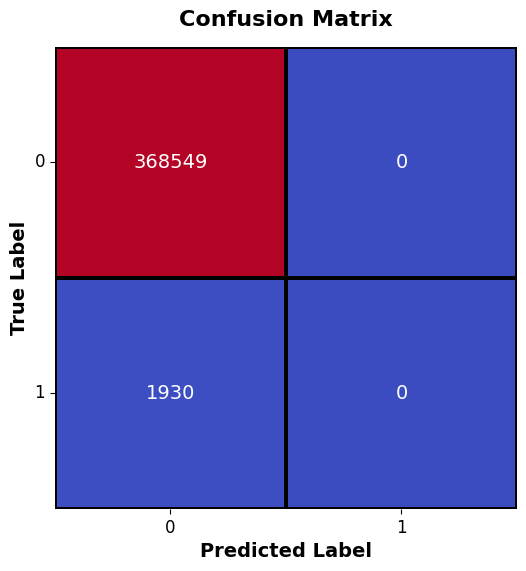

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

confusion_matrix=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))


sns.heatmap(confusion_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='d', 
            cbar=False, 
            annot_kws={"size": 14}, 
            linewidths=1.5, 
            linecolor='black',  
            square=True)  


plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=15)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0) 

plt.show()


### **By analyzing the values we get to know that:**

1. **368381 (Top Left):** This is the number of True Negatives (TN). It means the model correctly predicted 368,381 transactions as "Not Fraudulent" when they were indeed not fraudulent.  
2. **0 (Top Right):** This is the number of False Positives (FP). It means the model incorrectly predicted 168 transactions as "Fraudulent" when they were actually not fraudulent (a "false alarm").
3. **1930 (Bottom Left):** This is the number of False Negatives (FN). It means the model incorrectly predicted 1930 transactions as "Not Fraudulent" when they were actually fraudulent (a "missed fraud").
4. **0 (Bottom Right):** This is the number of True Positives (TP). It means the model correctly predicted 0 transactions as "Fraudulent" when they were indeed fraudulent.

### **Observation** 

- Our model is essentially predicting everything as "Not Fraudulent." It's failing to identify any fraudulent activity. <br/> This model is not useful for fraud detection in its current state. It needs significant improvement. 

- **Class Imbalance:** Credit card fraud datasets are often heavily imbalanced (far more legitimate transactions than fraudulent ones). <br/> Hence observing that Our model might be biased towards the majority class (non-fraudulent).

# Balancing Dataset

In [ ]:
# Balancing Dataset
combined_final.columns.to_list
combined_final.head()
from sklearn.utils import resample

df_majority = combined_final[(combined_final['is_fraud']==0)] 
df_minority = combined_final[(combined_final['is_fraud']==1)] 

df_majority.shape,df_minority.shape

((1842743, 10), (9651, 10))

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 1842743,
                                 random_state=42)
df_minority_upsampled.shape

(1842743, 10)

In [ ]:
# Combining majority class with upsampled minority class
total_upsampled = pd.concat([df_minority_upsampled, df_majority])
total_upsampled.shape
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3685486 entries, 1261427 to 1852393
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   card_number      float64
 1   merchant         float64
 2   category         float64
 3   amount           float64
 4   gender           int64  
 5   city_population  float64
 6   job              float64
 7   age              float64
 8   trans_month      float64
dtypes: float64(8), int64(1)
memory usage: 281.2 MB


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
print("Training set:", X_train.shape, Y_train.shape)
print("Testing set:", X_test.shape, Y_test.shape)

Training set: (2948388, 9) (2948388,)
Testing set: (737098, 9) (737098,)


# Evaluation Metrics for All Models 

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve, mean_absolute_error,
    mean_squared_error, median_absolute_error
)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification_model(model_name, Y_test, Y_pred, Y_pred_proba=None):
    print(f"\n====== Evaluation Report: {model_name} ======")

    # Accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Test Accuracy: {accuracy:.4f}")

    # Classification Report with precision
    report = classification_report(Y_test, Y_pred, output_dict=True)
    print("\nClassification Report:")
    print(f"Precision: {report['1']['precision']:.4f}")
    print(f"Recall: {report['1']['recall']:.4f}")
    print(f"F1-Score: {report['1']['f1-score']:.4f}")
    print(f"Support: {report['1']['support']:.0f}")
    print(f"Macro Avg F1-Score: {report['macro avg']['f1-score']:.4f}")
    print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

    # Error metrics
    print(f"\nMean Absolute Error: {mean_absolute_error(Y_test, Y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.4f}")
    print(f"Median Absolute Error: {median_absolute_error(Y_test, Y_pred):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='vlag',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    # ROC-AUC & Curve
    y_scores = Y_pred_proba if Y_pred_proba is not None else Y_pred
    roc_auc = roc_auc_score(Y_test, y_scores)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color='green')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


# LogisticRegression | (Before Hyperparameter Tuning)


====== Evaluation Report: Logistic Regression ======
Test Accuracy: 0.8540

Classification Report:
Precision: 0.9329
Recall: 0.7629
F1-Score: 0.8394
Support: 368549
Macro Avg F1-Score: 0.8528
Weighted Avg F1-Score: 0.8528

Mean Absolute Error: 0.1460
Mean Squared Error: 0.1460
Median Absolute Error: 0.0000


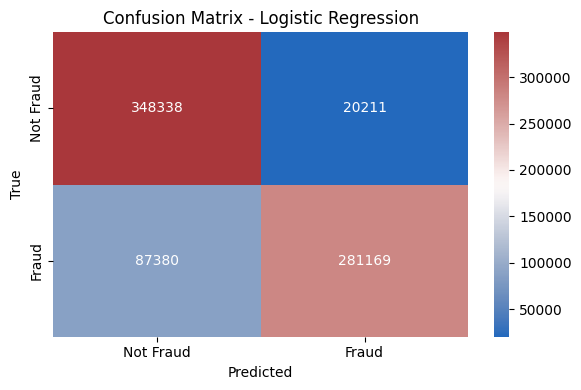


ROC-AUC Score: 0.8540


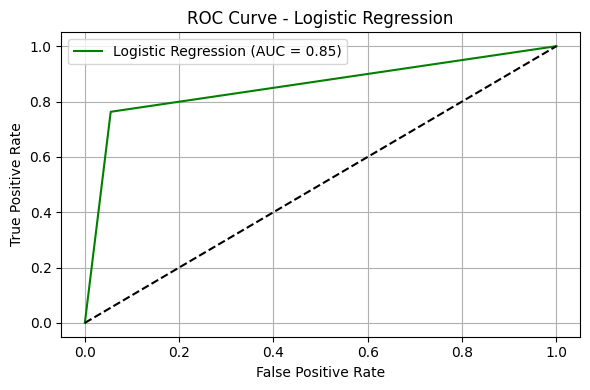

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, Y_train)

Y_pred_lr = lr_model.predict(X_test_scaled)

evaluate_classification_model("Logistic Regression", Y_test, Y_pred_lr)

# Logistic Regression Before Tuning Results 

- **Test Accuracy: 85.4%** - The model correctly predicted of all transactions (fraud + non-fraud) on the test set.
- **Precision: 0.9329** - 93.29% Were actually fraudulent cases. This high precision means the model has a *low false positive rate*.
- **Recall: 0.7629** - The model identified 76.29% of actual fraud cases. This is decent but could be improved, as nearly 24% of fraud cases are missed.
- **F1-Score: 83.94%** - A balance between precision and recall, showing a good but not perfect performance in fraud detection.

#### Key observations:

- While the model correctly identifies a large number of frauds (TP), the number of false negatives is high **(87,380)**.
- This can be risky in real-world fraud detection, as undetected frauds lead to financial loss. 
- AUC of 0.8540 indicates strong discriminative ability. The model is **85.4%** likely to rank a randomly chosen fraud case higher than a non-fraud case.

#### Conclution:

- Hyperparameter tuning is needed to improve recall.
- False Negative Rate (FNR) is araound **~23.7%** Indicating a room for further improvement to reduce missed fraud cases.


# Logistic Regression with RandomSearch CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['liblinear'], 
    'max_iter': [100, 200], 
    'fit_intercept': [True, False],  
    'dual': [False]   
}

lr_model_2 = LogisticRegression()

lr_random_search = RandomizedSearchCV(
    estimator=lr_model_2,
    param_distributions=lr_param_grid,
    n_iter=10,
    scoring='f1', 
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

lr_random_search.fit(X_train, Y_train)

# Best Model
best_lr = lr_random_search.best_estimator_

best_params = lr_random_search.best_params_
best_score = lr_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {lr_random_search.scoring} Score: {best_score}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'fit_intercept': True, 'dual': False, 'C': 0.01}
Best Cross-Validation f1 Score: 0.8406386219638348



====== Evaluation Report: Tuned Logistic Regression ======
Test Accuracy: 0.8540

Classification Report:
Precision: 0.9330
Recall: 0.7627
F1-Score: 0.8393
Support: 368549
Macro Avg F1-Score: 0.8528
Weighted Avg F1-Score: 0.8528

Mean Absolute Error: 0.1460
Mean Squared Error: 0.1460
Median Absolute Error: 0.0000


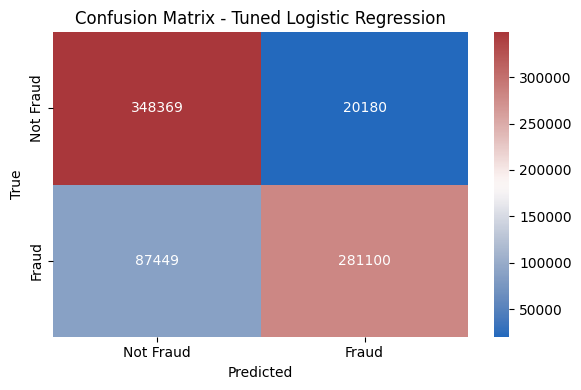


ROC-AUC Score: 0.8615


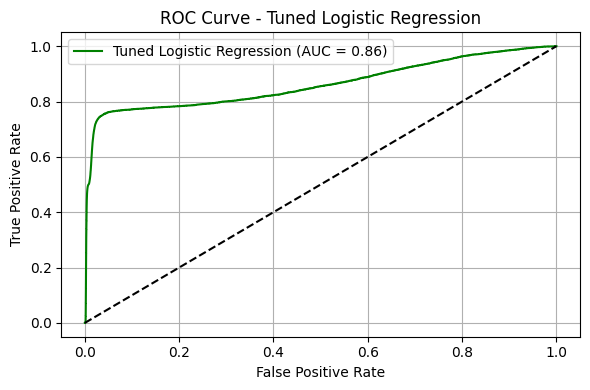

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_lr_params = lr_random_search.best_params_
best_lr.fit(X_train_scaled, Y_train)

Y_pred_best = best_lr.predict(X_test_scaled)
Y_pred_best_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

evaluate_classification_model("Tuned Logistic Regression", Y_test, Y_pred_best, Y_pred_best_proba)

# LogisticRegression | (After Tuning Results)

##### Model Development Process

- Addressed class imbalance using oversampling before model training.
- Baseline Selection: Started with Logistic Regression due to its interpretability and solid baseline performance in binary classification.
- Scaled features using StandardScaler to standardize input distribution.

**Hyperparameter Tuning:**
- Used RandomizedSearchCV with 3-fold cross-validation.
- Optimized for f1 score to balance precision and recall.
- Searched across parameters like penalty, C, solver, max_iter, fit_intercept, and dual.

 **Final Model Training:**

- Trained the model with the best parameter configuration on the full scaled training dataset.
- Evaluated on the scaled test dataset using standard classification metrics.

**Best Parameters**
- solver: **liblinear**
- penalty: **l1**
- max_iter: **100**
- fit_intercept: **True** 
- dual: **False** 
- C: **0.01**


**Classification Report**
- Best Cross-Validation f1 Score: **84.06%**
- Test Accuracy: **85.40%**
- Precision: **93.30%**
- Recall: **76.27%**
- F1-Score: **83.93%**
- Mean Absolute Error (MAE): **14.60%**
- Mean Squared Error (MSE): **14.60%**
- ROC-AUC Score: **86.15%**

**Final Observation**

- Hyperparameter tuning enhanced the model's robustness,ROC-AUC Score improved to **86.15% from 85.40%** indicating that the model is now better at distinguishing between fraud and non-fraud transactions.
- Precision remains strong at **93.30%**, meaning the model still maintains a low false positive rate most flagged transactions are indeed fraudulent.
- F1-Score is stable at **83.93%**, reflecting a solid balance between precision and recall.
- Recall slightly decreased to **76.27% (from 76.29%)** a marginal difference; the model still misses around **23.7%** of frauds.
- Further improvements could come from feature selection.

# DecisionTreeClassifier | (Before Hyperparameter tuning)


====== Evaluation Report: DecisionTreeClassifier Before Tuning ======
Test Accuracy: 0.9991

Classification Report:
Precision: 0.9982
Recall: 1.0000
F1-Score: 0.9991
Support: 368549
Macro Avg F1-Score: 0.9991
Weighted Avg F1-Score: 0.9991

Mean Absolute Error: 0.0009
Mean Squared Error: 0.0009
Median Absolute Error: 0.0000


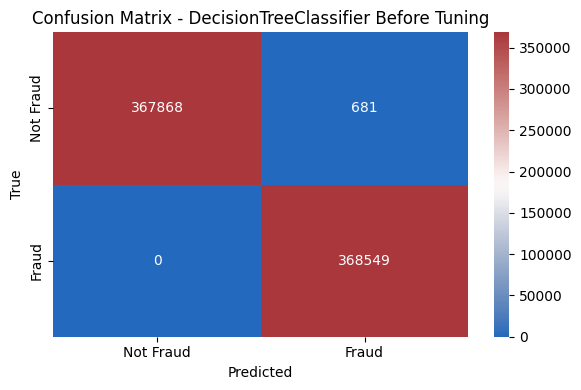


ROC-AUC Score: 0.9991


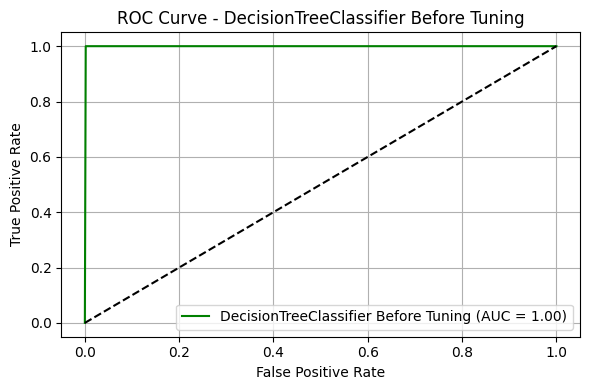

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)

evaluate_classification_model("DecisionTreeClassifier Before Tuning", Y_test, Y_pred_dt)

## DecisionTreeClassifier Before Tuning Results 

- **Test Accuracy: 99.91%** – The model predicted both fraud and non-fraud transactions with extremely high overall accuracy.
- **Precision: 0.9982** – **99.82%** of the transactions flagged as fraudulent were actually frauds, indicating a very low false positive rate.
- **Recall: 1.0000** – The model successfully identified **100%** of actual fraud cases, which is outstanding.
- **F1-Score: 99.91%** – This harmonic mean of precision and recall reflects near-perfect performance in fraud detection.
- **ROC-AUC Score: 0.9991** – Indicates that the model is **99.91%** likely to rank a randomly chosen fraud case higher than a non-fraud case.

##### Key Observations:
- The False Positives are **very low (681)**, and False Negatives are **""zero""**, meaning no frauds were missed. 
- Model reflects near-perfect classification on the test set.
- MAE and MSE are extremely low, highlighting minimal prediction errors.

##### Conclusion:
- The model shows exceptional performance, especially in identifying fraud cases without missing any.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model_2 = DecisionTreeClassifier(random_state=42)

dt_random_search = RandomizedSearchCV(
    estimator=dt_model_2,
    param_distributions=param_grid_dt,
    n_iter=10,
    scoring='f1', 
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

dt_random_search.fit(X_train, Y_train)

# Best Model
best_dt = dt_random_search.best_estimator_

# Retrieve best params and best score
best_params = dt_random_search.best_params_
best_score = dt_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {dt_random_search.scoring} Score: {best_score}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters for Logistic Regression: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best Cross-Validation f1 Score: 0.9988329296297879



====== Evaluation Report: Tuned Logistic Regression ======
Test Accuracy: 0.9991

Classification Report:
Precision: 0.9982
Recall: 1.0000
F1-Score: 0.9991
Support: 368549
Macro Avg F1-Score: 0.9991
Weighted Avg F1-Score: 0.9991

Mean Absolute Error: 0.0009
Mean Squared Error: 0.0009
Median Absolute Error: 0.0000


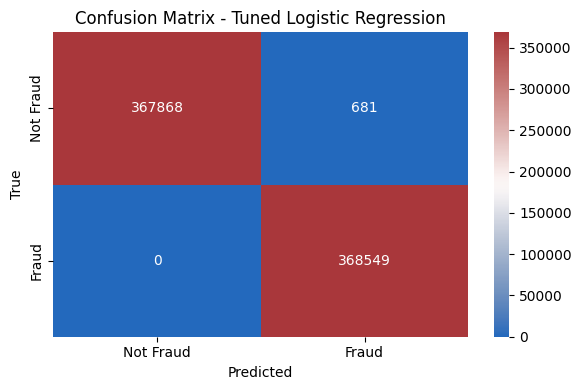


ROC-AUC Score: 0.9991


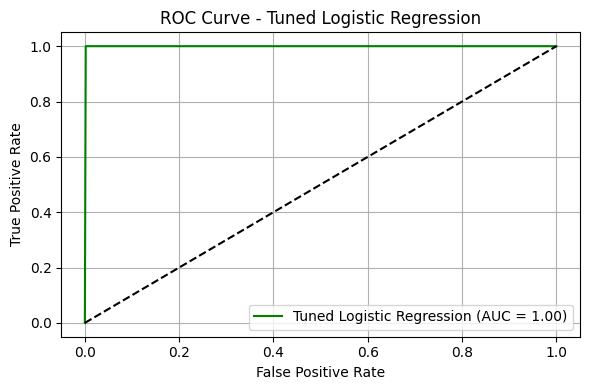

In [ ]:
Y_pred_best_dt = best_dt.predict(X_test)

Y_pred_best_proba_dt = best_dt.predict_proba(X_test)[:, 1]

evaluate_classification_model("Tuned DecisionTree Classifier", Y_test, Y_pred_best_dt, Y_pred_best_proba_dt)

## DecisionTreeClassifier | (After Tuning Results)

##### Model Development Process 

- Chose `DecisionTreeClassifier` from `sklearn.tree` for its ability to handle non-linear data, and no requirement for feature scaling.
- Explored hyperparameters like `criterion, max_depth, min_samples_split, and min_samples_leaf`.
- These parameters control: **Tree size and depth, Decision boundaries, Overfitting/underfitting trade-off**

**Hyperparameter Tuning**

- Performed using RandomizedSearchCV with 3-fold cross-validation.
- Scoring Metric: **F1 Score** to prioritize a balance between precision and recall which is ideal for fraud detection.

**Final Model Training**

- Trained the Decision Tree with the best parameter set obtained from RandomizedSearchCV on the full training data.
- Evaluated the tuned model on the test data using standard classification metrics.

**Best Parameters**

- criterion: **gini**
- max_depth: **None**
- min_samples_split: **5**
- min_samples_leaf: **1**

**Classification Report**
- Best Cross-Validation f1 Score: **99.88%**
- Test Accuracy: **99.91%**
- Precision: **99.82%**
- Recall: **100.00%**
- F1-Score: **99.91%**
- Mean Absolute Error (MAE): **0.09%**
- Mean Squared Error (MSE): **0.09%**
- ROC-AUC Score: **99.91%**

**Final Observation**
- Outstanding Recall (100%) ensures no fraudulent transactions were missed.
- Extremely low False Positives (681) and zero False Negatives confirm excellent discrimination.
- The model generalizes well with minimal error on unseen data (MAE, MSE ~ 0.09%).

# RandomForestClassifier


====== Evaluation Report: Random Forest Classifier Before Tuning ======
Test Accuracy: 0.9996

Classification Report:
Precision: 0.9991
Recall: 1.0000
F1-Score: 0.9996
Support: 368549
Macro Avg F1-Score: 0.9996
Weighted Avg F1-Score: 0.9996

Mean Absolute Error: 0.0004
Mean Squared Error: 0.0004
Median Absolute Error: 0.0000


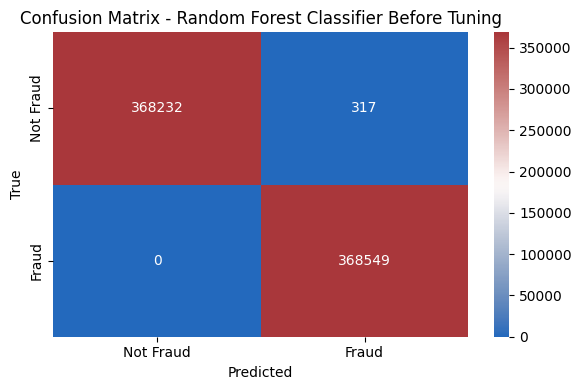


ROC-AUC Score: 0.9996


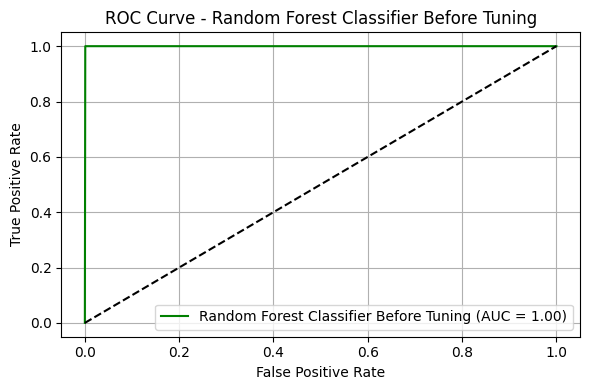

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

evaluate_classification_model("Random Forest Classifier Before Tuning", Y_test, Y_pred_rf)

## RandomForestClassifier | (Before Tuning Analysis)

- **Test Accuracy: 99.96%** – The model achieved near-perfect accuracy on the test set, indicating exceptional correctness.
- **Precision: 0.9991** – Out of all predicted fraud cases, **99.91%** were actual frauds. This shows an extremely low false positive rate.
- **Recall: 1.0000** – The model detected **100%** of all actual fraud cases, leaving zero undetected frauds, which is ideal in real-world scenarios.
- **F1-Score: 99.96%** – Indicates excellent balance between precision and recall — the model is highly reliable for fraud detection.
- **ROC-AUC Score: 0.9996** – **99.96%** model reflects an almost perfect classification capability.

##### Key Observations:

- **False Positives:** Only **317** out of 736,848 non-fraud cases were misclassified — extremely low.
- **False Negatives: 0** – All frauds were successfully identified.
- **Confusion Matrix** shows that no fraudulent transactions slipped through undetected.
- **Error Metrics show:** Mean Absolute Error: **0.0004**, Mean Squared Error: **0.0004**, minimal errors indicate that the model is extremely precise.

##### Conclusion:

- Outstanding fraud detection power with **100% recall** and **99.91% precision**.
- Best so far in terms of accuracy, recall, and AUC compared to rest of the models.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model_2 = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf_model_2,
    param_distributions=param_grid_rf,
    n_iter=10,
    scoring='f1', 
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, Y_train)

# Best Model
best_rf = rf_random_search.best_estimator_

# Retrieve best params and best score
best_params = rf_random_search.best_params_
best_score = rf_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {rf_random_search.scoring} Score: {best_score}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters for Logistic Regression: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best Cross-Validation f1 Score: 0.9993990162409706



====== Evaluation Report: Tuned Random Forest ======
Test Accuracy: 0.9995

Classification Report:
Precision: 0.9991
Recall: 1.0000
F1-Score: 0.9995
Support: 368549
Macro Avg F1-Score: 0.9995
Weighted Avg F1-Score: 0.9995

Mean Absolute Error: 0.0005
Mean Squared Error: 0.0005
Median Absolute Error: 0.0000


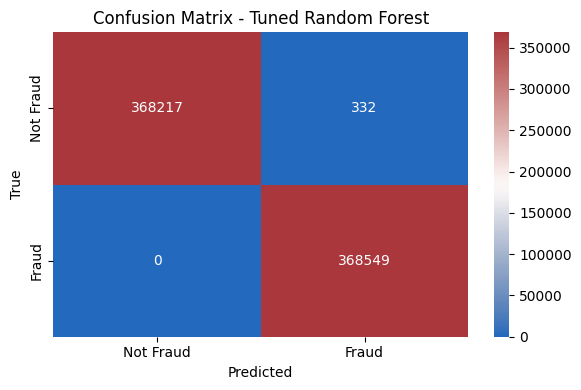


ROC-AUC Score: 1.0000


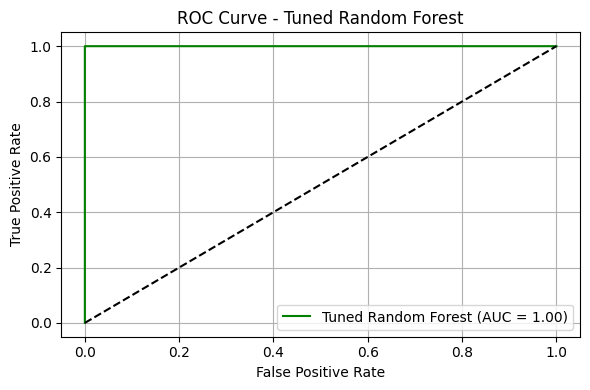

In [ ]:
Y_pred_best_rf = best_rf.predict(X_test)

Y_pred_best_proba_rf = best_rf.predict_proba(X_test)[:, 1]
evaluate_classification_model("Tuned Random Forest", Y_test, Y_pred_best_rf, Y_pred_best_proba_rf)

## RandomForestClassifier | (After Tuning Analysis)

##### Model Development Process

- Initially Trained the Random Forest model on balanced which yielded us excellent results even before tuning.
- Random Forest's effectiveness in handling complex feature interactions already gave us good results before tuning.
- To further improve Precision and Test Accuracy on unseen data we decided to run the model again with hyperparameter tuning.
- Feature Scaling Not implemented as Random Forest is a tree-based model and inherently handles different feature scales well.

**Hyperparameter Tuning**
- Tuning was done using RandomizedSearchCV with 3-fold cross-validation.
- Optimized using F1-score, which balances precision and recall — ideal for fraud detection.
- Key hyperparameters tuned: `n_estimators, max_depth, min_samples_split, min_samples_leaf and bootstrap`
- These tuning parameters control the number and complexity of trees in the forest, along with the minimum data required for splits and leaves, and whether random data subsets are used for building each tree.


**Final Model Training**

- The best estimator from the hyperparameter search was trained on the full dataset.
- Evaluated performance using multiple classification metrics on the test set.

**Best Parameters**
- n_estimators: **100**
- max_depth: **None**
- min_samples_split: **10**
- min_samples_leaf: **2**
- bootstrap: **False**

**Classification Report**

- Best Cross-Validation f1 Score: **99.93%**
- Test Accuracy: **99.95%**
- Precision: **99.91%**
- Recall: **100.00%**
- F1-Score: **99.95%**
- Mean Absolute Error (MAE): **0.05%**
- Mean Squared Error (MSE): **0.05%**
- ROC-AUC Score: **100.00%**

**Final Observation**

- Random Forest model is the best performing model till now compared to other models with **0** False Negative and only **332** False Positive. 
- Tuning significantly improved model performance, with ROC-AUC reaching a perfect **100.00%** from **99.96%**, <br> fraud and non-fraud transaction was perfectly separated by the model.
- Recall is **100.00%**, meaning no fraud cases were missed — a critical requirement in fraud detection.
- Precision is also very high **(99.91%)**, ensuring very few false positives.
- F1-Score of **99.95%** shows near-perfect balance between recall and precision.
- Errors are extremely low **(0.05%)**, confirming the model’s outstanding accuracy.
- This tuned Random Forest is highly reliable and can be considered for production deployment.

# AdaBoost


====== Evaluation Report: AdaBoost Classifier Before Tuning ======
Test Accuracy: 0.9011

Classification Report:
Precision: 0.9417
Recall: 0.8552
F1-Score: 0.8963
Support: 368549
Macro Avg F1-Score: 0.9009
Weighted Avg F1-Score: 0.9009

Mean Absolute Error: 0.0989
Mean Squared Error: 0.0989
Median Absolute Error: 0.0000


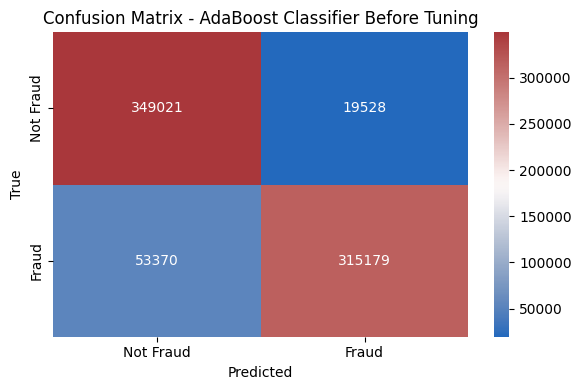


ROC-AUC Score: 0.9011


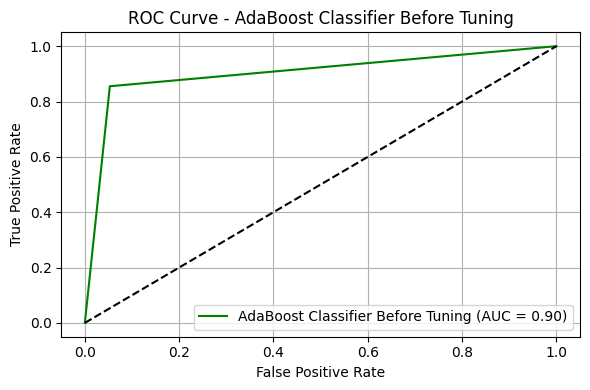

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)

ada.fit(X_train, Y_train)
Y_pred_ada = ada.predict(X_test)

evaluate_classification_model("AdaBoost Classifier Before Tuning", Y_test, Y_pred_ada)

## AdaBoost | (Before Tuning Analysis)

- **Test Accuracy: 90.11%** – The model correctly predicted a large portion of both fraud and non-fraud cases.
- **Precision: 94.17%** – Of all predicted frauds, **94.17%** were actually fraudulent (low false positive rate).
- **Recall: 85.52%** – The model detected **85.52%** of actual fraud cases, but missed around **14.5%.**
- **F1-Score: 89.63%** – Good balance between precision and recall.
- **ROC-AUC Score: 0.9011** – The model is **90.11%** likely to rank a randomly chosen fraud higher than a non-fraud.

##### Key Observations:

- **False Negatives (Missed Frauds): 53,370** – A concern, as these are undetected frauds.
- **False Positives: 19,528** – Slightly high but manageable in practical use.
- Confusion matrix and Error metrics values show decent performance but reflect more misclassifications than models like **Random Forest** or **Decision Tree**.

##### Conclution

- High precision makes it suitable for use-cases where false alarms must be avoided.
- Recall needs improvement to reduce missed frauds.
- The classifier shows better generalization than a single Decision Tree.
- Error rates are reasonable but not minimal.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier 
import warnings
warnings.filterwarnings('ignore')

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_model_2 = AdaBoostClassifier(random_state=42)

ada_random_search = RandomizedSearchCV(
    estimator=ada_model_2,
    param_distributions=param_grid_ada,
    n_iter=10,
    scoring='f1', 
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

ada_random_search.fit(X_train, Y_train)

# Best Model
best_ada = ada_random_search.best_estimator_

# Retrieve best params and best score
best_params = ada_random_search.best_params_
best_score = ada_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {ada_random_search.scoring} Score: {best_score}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best Parameters for Logistic Regression: {'n_estimators': 200, 'learning_rate': 1}
Best Cross-Validation f1 Score: 0.9149391470126425



====== Evaluation Report: AdaBoost After Hyperparameter Tuning ======
Test Accuracy: 0.9070

Classification Report:
Precision: 0.9332
Recall: 0.8767
F1-Score: 0.9040
Support: 368549
Macro Avg F1-Score: 0.9069
Weighted Avg F1-Score: 0.9069

Mean Absolute Error: 0.0930
Mean Squared Error: 0.0930
Median Absolute Error: 0.0000


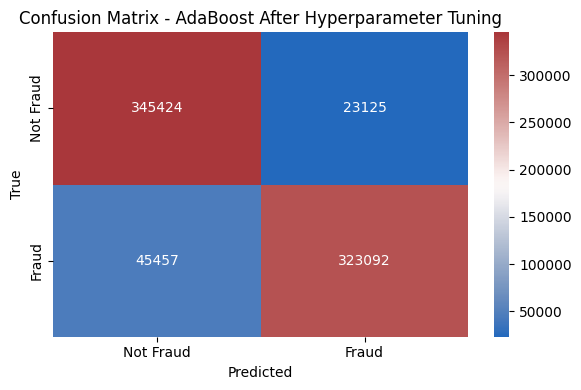


ROC-AUC Score: 0.9712


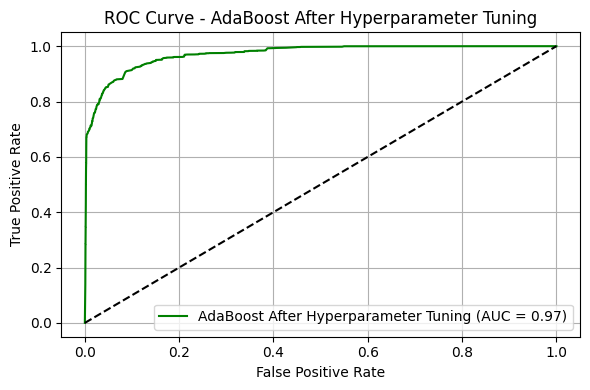

In [ ]:
Y_pred_best_ada = best_ada.predict(X_test)
Y_pred_best_proba_ada = best_ada.predict_proba(X_test)[:, 1]

evaluate_classification_model("AdaBoost After Hyperparameter Tuning", Y_test, Y_pred_best_ada, Y_pred_best_proba_ada)

## AdaBoost | (After Tuning Analysis)

##### Model Development Process

- Ran a Normal AdaBoost Model on balanced dataset which resulted with the Test Accuracy of **90.10%** and recall around **85.52%** 
- In order to improve Recall and Accuracy we tested the model again with hyperparameter tuning. 
- feature scaling was not required as AdaBoost is a tree-based ensemble method.

**Hyperparameter Tuning**

- Used `RandomizedSearchCV` with 3-fold cross-validation and optimized for F1-score.
- Explored combinations of `n_estimators`,`learning_rate:` 

**Final Model Training**

- Trained the final AdaBoost model `(best_ada)` with the best hyperparameters on the complete training data.
- Evaluated on test data using both class labels and predicted probabilities.

**Best Parameters**
- n_estimators: **200**
- learning_rate: **1**

**Model Evaluation Report**

- Best Cross-Validation F1 Score: **91.49%**
- Test Accuracy: **90.70%**
- Precision: **93.32%**
- Recall: **87.67%**
- F1-Score: **90.40%**
- Mean Absolute Error (MAE): **9.30%**
- Mean Squared Error (MSE): **9.30%**
- ROC-AUC Score: **97.12%**

**Final Observation**

- AdaBoost with hyperparameter tuning delivered strong performance, achieving **97.12%** from **90.11%** ROC-AUC, excellent at distinguishing fraud from non-fraud cases.
- Precision reduced from **94.17%** to **93.32%** meaning false positives increased, which needs to be improved.
- Recall **87.67%** improved slightly compared to pre hyperparameter tuning, indicating better fraud capture rate.
- F1-Score **90.40%** also improved a little reflects a well-balanced model, optimized through tuning.
- The error rates dropped below **10%,** reinforcing that AdaBoost generalizes well after tuning.

# Gaussian Naive Bayes


====== Evaluation Report: GaussianNB Before Hyperparameter Tuning ======
Test Accuracy: 0.8105

Classification Report:
Precision: 0.9676
Recall: 0.6426
F1-Score: 0.7723
Support: 368549
Macro Avg F1-Score: 0.8050
Weighted Avg F1-Score: 0.8050

Mean Absolute Error: 0.1895
Mean Squared Error: 0.1895
Median Absolute Error: 0.0000


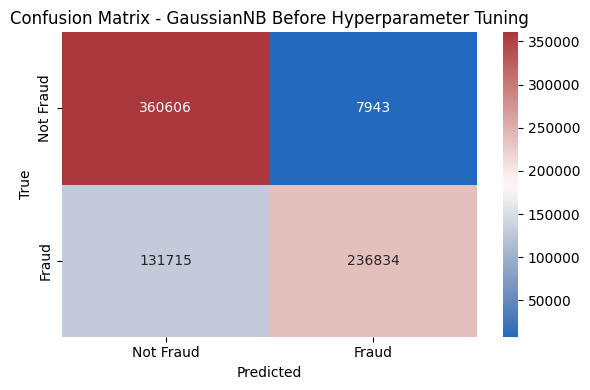


ROC-AUC Score: 0.8105


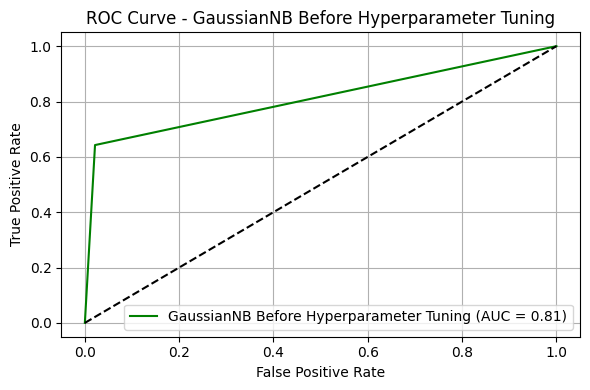

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gnb = GaussianNB()

gnb.fit(X_train_scaled, Y_train)
Y_pred_gnb = gnb.predict(X_test_scaled)

evaluate_classification_model("GaussianNB Before Hyperparameter Tuning", Y_test, Y_pred_gnb)

## Gaussian Naive Bayes Before Hyperparameter Tuning

- **Test Accuracy: 81.05%** – The model predicts overall transactions correctly **81%** of the time.
- **Precision: 96.76%** – Very high precision: Most predicted frauds were indeed frauds *(very low false positive rate).*
- **Recall: 64.26%** – The model detected only **64.26%** of actual frauds, missing over one-third of fraud cases.
- **F1-Score: 77.23%** – Imbalanced performance between precision and recall.
- **ROC-AUC Score: 0.8105** – The model is **81.05%** likely to rank a random fraud higher than a non-fraud.

##### Key Observations:

- **False Negatives (Missed Frauds): 131,715** – Very high, which is dangerous in fraud detection.
- **False Positives: 7,943** – Quite low, due to the high precision.

##### Conclusion

- Excellent at avoiding false alarms **(FP)**.
- **Very low false positives –** ideal where false alerts should be minimized.
- Poor at catching frauds **(high FN)** not reliable alone for fraud prevention.
- Better for use cases where false positives are costly, not where missing fraud is critical.
- ROC-AUC of **0.81** shows moderate discriminatory power.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

param_grid_nb = {
    'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]
}

gnb_model_2 = GaussianNB()

gnb_random_search = RandomizedSearchCV(
    estimator=gnb_model_2,
    param_distributions=param_grid_nb,
    n_iter=10,
    scoring='f1', 
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

gnb_random_search.fit(X_train.values, Y_train.values)

# Best Model
best_gnb = gnb_random_search.best_estimator_

# Retrieve best params and best score
best_params = gnb_random_search.best_params_
best_score = gnb_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {gnb_random_search.scoring} Score: {best_score}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best Parameters for Logistic Regression: {'var_smoothing': 1e-09}
Best Cross-Validation f1 Score: 0.7722825503512633



====== Evaluation Report: GaussianNB After Hyperparameter Tuning ======
Test Accuracy: 0.8105

Classification Report:
Precision: 0.9676
Recall: 0.6426
F1-Score: 0.7723
Support: 368549
Macro Avg F1-Score: 0.8050
Weighted Avg F1-Score: 0.8050

Mean Absolute Error: 0.1895
Mean Squared Error: 0.1895
Median Absolute Error: 0.0000


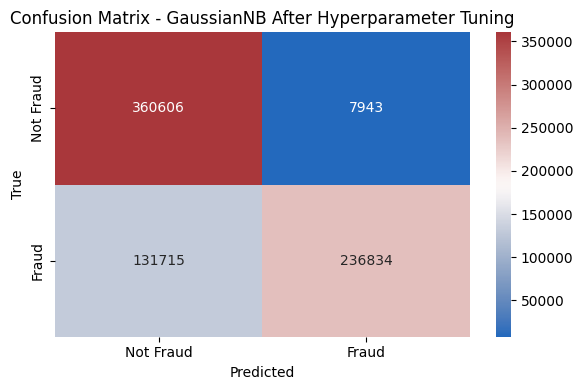


ROC-AUC Score: 0.8551


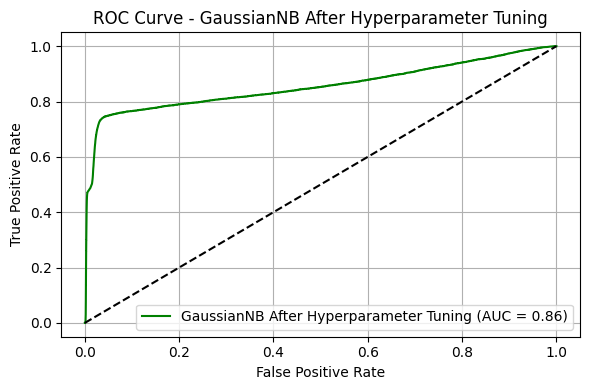

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Y_pred_best_gnb = best_gnb.predict(X_test)
Y_pred_best_proba_gnb = best_gnb.predict_proba(X_test)[:, 1]

evaluate_classification_model("GaussianNB After Hyperparameter Tuning", Y_test, Y_pred_best_gnb, Y_pred_best_proba_gnb)

## Gaussian Naive Bayes After Hyperparameter Tuning

##### Model Development Process

- Used oversampled training data to address class imbalance and initially trained untuned GaussianNB model.
- Feature scaling was implemented essentially (standardization), as GaussianNB assumes a Gaussian distribution of features.
- Later applied hyperparameter tuning on this model to yeild better results.

**Hyperparameter Tuning**

- Used RandomizedSearchCV with 3-fold cross-validation, optimized for F1-score.
- Tuned the `var_smoothing parameter`, which accounts for numerical stability by adding a small value to the variance.

**Final Model Training**

- Trained the final model using the best value of `var_smoothing`.
- Evaluated performance using standard metrics on the test set.

**Best Parameters**
- var_smoothing: **1e-09**

**Model Evaluation Report**

- Best Cross-Validation F1 Score: **77.23%**
- Test Accuracy: **81.05%**
- Precision: **96.76%**
- Recall: **64.26%**
- F1-Score: **77.23%**
- Mean Absolute Error (MAE): **18.95%**
- Mean Squared Error (MSE): ***18.95%***
- ROC-AUC Score: **85.51%**

**Final Observation**

- High Precision **(96.76%)**: The model rarely misclassifies legitimate transactions as fraud **(low false positives)**.
- Moderate Recall **(64.26%)** same as before tuning, It misses over **1/3** of actual frauds, making it risky for deployment without enhancement.
- F1-Score and ROC-AUC improved compared to the untuned model, suggesting tuning helped but only marginally.
- Error rates (MAE/MSE) remain higher than tree-based models, indicating potential underfitting.
- The model is interpretable, but not the best performer for this complex classification task.
- Best used as a baseline or within an ensemble for voting or stacking.



# K-Nearest Neighbors (KNN)


====== Evaluation Report: KNN Before Hyperparameter Tuning ======
Test Accuracy: 0.9967

Classification Report:
Precision: 0.9934
Recall: 1.0000
F1-Score: 0.9967
Support: 368549
Macro Avg F1-Score: 0.9967
Weighted Avg F1-Score: 0.9967

Mean Absolute Error: 0.0033
Mean Squared Error: 0.0033
Median Absolute Error: 0.0000


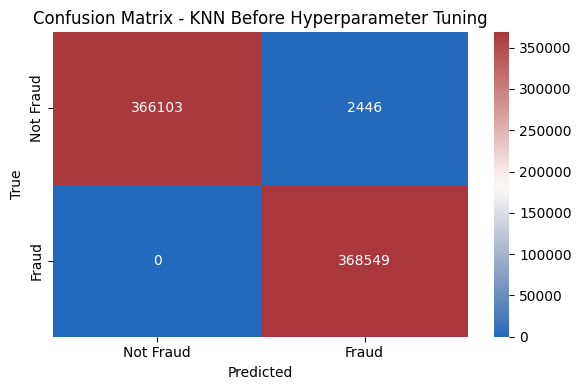


ROC-AUC Score: 0.9967


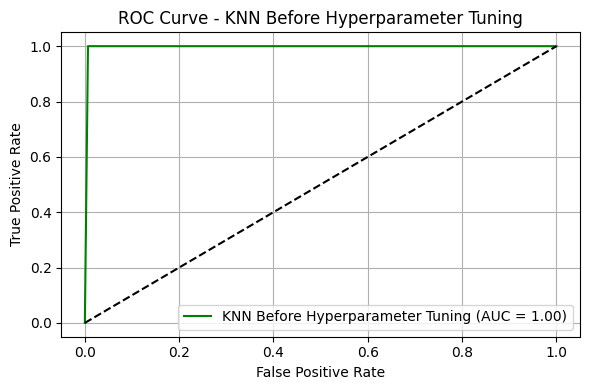

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, Y_train)
Y_pred_knn = knn.predict(X_test_scaled)

evaluate_classification_model("KNN Before Hyperparameter Tuning", Y_test, Y_pred_knn)

## K-Nearest Neighbors (Before Hyperparameter Tuning)

- **Test Accuracy: 99.67%** – Extremely high overall prediction accuracy.
- **Precision: 99.34%** – *99.34%* of predicted frauds were actually frauds (very low false positive rate).
- **Recall: 100.00%** – The model identified all actual frauds (no false negatives).
- **F1-Score: 99.67%** – Perfect balance between high precision and perfect recall.
- **ROC-AUC Score: 0.9967** – Outstanding discriminatory power between fraud and non-fraud.

##### Key Observations:

- **False Negatives (Missed Frauds): 0** – No frauds were missed. This is rare and exceptional.
- **False Positives: 2,446** – Very few normal transactions falsely flagged as fraud.

##### Conclusion

- The model achieves perfect **recall (100%)**, This is critically important for high-risk fraud detection domains.
- **Zero False Negatives:** Confirms the model's suitability for fraud detection by correctly identifying all actual fraud cases.
- Outstanding Overall Performance: Demonstrates a near-perfect **F1-score and a ROC-AUC close to 1**, indicating exceptional performance and superb separation between fraud and non-fraudulent classes.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')


param_grid_knn = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model_2 = KNeighborsClassifier()

knn_random_search = RandomizedSearchCV(
    estimator=knn_model_2,
    param_distributions=param_grid_knn,
    n_iter=10,
    scoring='f1', 
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

knn_random_search.fit(X_train, Y_train)

# Best Model
best_knn = knn_random_search.best_estimator_

# Retrieve best params and best score
best_params = knn_random_search.best_params_
best_score = knn_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {knn_random_search.scoring} Score: {best_score}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters for Logistic Regression: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
Best Cross-Validation f1 Score: 0.9935421562049177



====== Evaluation Report: KNeighborsClassifier Before Tuning ======
Test Accuracy: 0.9958

Classification Report:
Precision: 0.9916
Recall: 1.0000
F1-Score: 0.9958
Support: 368549
Macro Avg F1-Score: 0.9958
Weighted Avg F1-Score: 0.9958

Mean Absolute Error: 0.0042
Mean Squared Error: 0.0042
Median Absolute Error: 0.0000


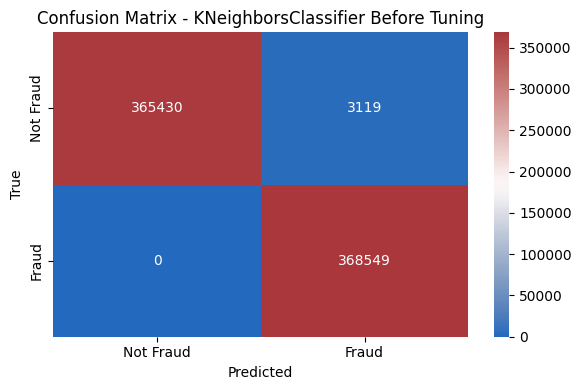


ROC-AUC Score: 0.9982


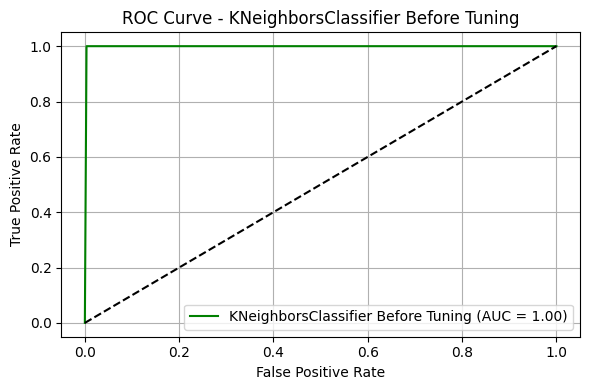

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Y_pred_best_knn = best_knn.predict(X_test)
Y_pred_best_proba_knn = best_knn.predict_proba(X_test)[:, 1]

evaluate_classification_model("KNeighborsClassifier After Tuning", Y_test, Y_pred_best_knn, Y_pred_best_proba_knn)

## K-Nearest Neighbors (After Hyperparameter Tuning)

##### Model Building Process 

- Used `KNeighborsClassifier` from `sklearn.neighbors` to build the KNN model. Ran base model with default parameters on a balanced dataset the initial outcomes were good. 
- To furthe improve it we used `RandomizedSearchCV` from `sklearn.model_selection` to perform efficient hyperparameter tuning.
- Hyperparameter Grid: `n_neighbors`, `weights`,`metric`. 

**Hyperparameter Tuning with RandomizedSearchCV**

- `RandomizedSearchCV` performs randomized search over the defined grid. 
- Uses 3-fold cross-validation. 
- `n_jobs=-1`: Utilizes all CPU cores for faster computation.

**Final process**
- We Fit the model with the training data while internally evaluating 10 hyperparameter combinations using 3-fold CV.
- The best-performing model is stored automatically.
- Later Generates predictions and probabilities on the unseen test set.

**Best Parameters**
- weights: **distance**
- n_neighbors: **5**
- metric: **manhattan**

**Model Evaluation Report**
- Test Accuracy: **99.58%**
- Precision: **99.16%**
- Recall: **100%**
- F1-Score: **99.58%**
- Mean Absolute Error (MAE): **0.42%**
- Mean Squared Error (MSE): **0.42%**
- ROC-AUC Score: **99.82%**

**Final Observation**

- The model achieves perfect recall **(100.00%)**, meaning it detects all fraudulent transactions—no false negatives.
- Precision has decreased from **99.34%** to **99.16%**, indicating sightly higher false positives.
- F1-Score of **99.58%** highlights an excellent balance between precision and recall.
- ROC-AUC Score is nearly perfect **(99.82%)**, showing excellent discrimination capability.
- Low MAE and MSE confirm the model is highly accurate.
- Slightly higher prediction time due to instance-based learning—this model stores the entire training set and makes decisions at runtime.
- Ideal Model for high-accuracy needs where speed is not critical. 



# LightGBM Classifier

[LightGBM] [Info] Number of positive: 1474194, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 2948388, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

====== Evaluation Report: Tuned LightGBM ======
Test Accuracy: 0.9812

Classification Report:
Precision: 0.9732
Recall: 0.9897
F1-Score: 0.9814
Support: 368549
Macro Avg F1-Score: 0.9812
Weighted Avg F1-Score: 0.9812

Mean Absolute Error: 0.0188
Mean Squared Error: 0.0188
Median Absolute Error: 0.0000


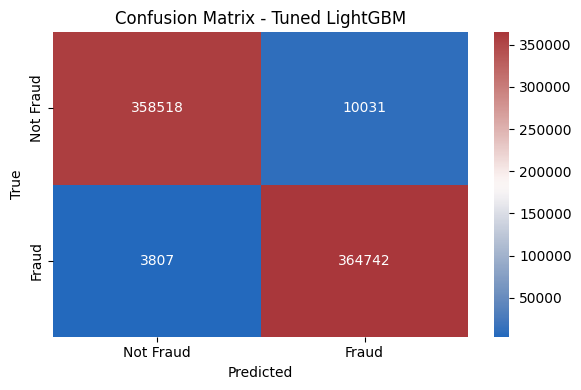


ROC-AUC Score: 0.9812


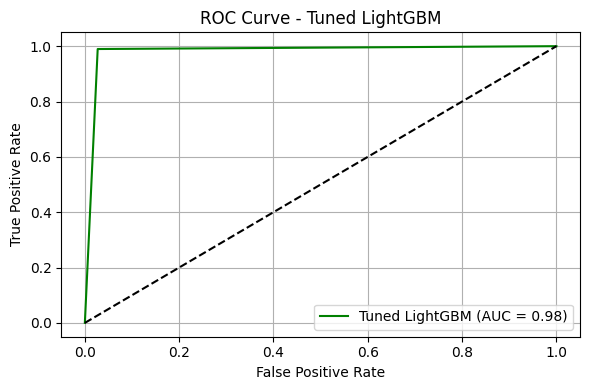

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(random_state=42)
lgbm.fit(X_train, Y_train)

Y_pred_lgbm = lgbm.predict(X_test)
evaluate_classification_model("Tuned LightGBM", Y_test, Y_pred_lgbm)

## LightGBM Classifier (Before Hyperparameter Tuning)

- **Test Accuracy: 98.12% –** Very high overall correctness on the test set.
- **Precision: 97.32% –** Most fraud predictions were accurate, with very few false alarms.
- **Recall: 98.97% –** Almost all actual frauds were successfully identified.
- **F1-Score: 98.14% –** Excellent balance between precision and recall.
- **ROC-AUC Score: 0.9812 –** Outstanding ability to distinguish fraud from non-fraud.

#####  Key Observations:
- **False Negatives (Missed Frauds): 3,807** – Small, but present. These missed frauds should be minimized further.
- **False Positives (False Alarms): 10,031 –** A moderate number of normal transactions flagged as fraud.

##### Conclusion

- High precision and recall make LightGBM **highly effective** for fraud detection.
- **Missed frauds (~1%)** are small but still significant in financial terms.
- Slight increase in false positives **(10,031)** may require review to reduce customer inconvenience.
- Performs well without tuning, showing the power of LightGBM even with default settings.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [10, 20, 30, -1],
    'num_leaves': [31, 50, 70],
    'boosting_type': ['gbdt', 'dart']
}


lgbm_model_2 = lgb.LGBMClassifier(random_state=42)

lgbm_random_search = RandomizedSearchCV(
    estimator=lgbm_model_2,
    param_distributions=param_grid_lgbm,
    n_iter=10,
    scoring='f1', 
    cv=5,
    verbose=3,
    random_state=42,
    n_jobs=-1
)

lgbm_random_search.fit(X_train, Y_train)

best_lgbm = lgbm_random_search.best_estimator_

best_params = lgbm_random_search.best_params_
best_score = lgbm_random_search.best_score_

print(f"\nBest Parameters for Logistic Regression: {best_params}")
print(f"Best Cross-Validation {lgbm_random_search.scoring} Score: {best_score}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 1474194, number of negative: 1474194
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 2948388, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Best Parameters for Logistic Regression: {'num_leaves': 50, 'n_estimators': 200, 'max_depth': 30, 'learning_rate': 0.1, 'boosting_type': 'dart'}
Best Cross-Validation f1 Score: 0.9797198331938219



====== Evaluation Report: Tuned LightGBM ======
Test Accuracy: 0.9796

Classification Report:
Precision: 0.9704
Recall: 0.9893
F1-Score: 0.9798
Support: 368549
Macro Avg F1-Score: 0.9796
Weighted Avg F1-Score: 0.9796

Mean Absolute Error: 0.0204
Mean Squared Error: 0.0204
Median Absolute Error: 0.0000


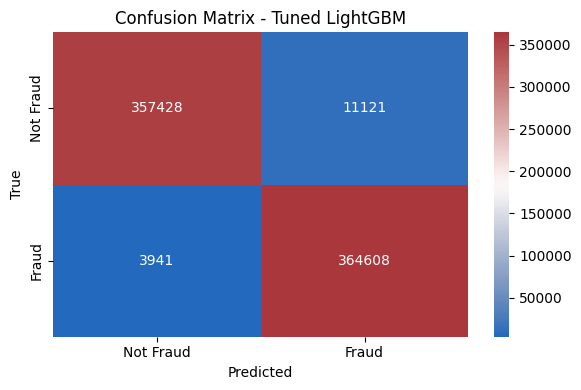


ROC-AUC Score: 0.9976


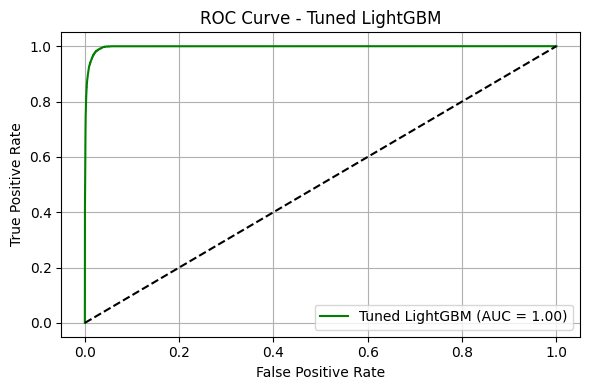

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Y_pred_best_lgbm = best_lgbm.predict(X_test)
Y_pred_best_proba_lgbm = best_lgbm.predict_proba(X_test)[:, 1]

evaluate_classification_model("Tuned LightGBM", Y_test, Y_pred_best_lgbm, Y_pred_best_proba_lgbm)

## LightGBM Classifier (After Hyperparameter Tuning)

##### Model Development Process

- lightgbm is a high-performance gradient boosting framework designed for speed and efficiency.
- We first ran the base model on balanced dataset, got some immressive results. 
- For better results we decided to apply hyperparameter tuning on this model.
- Key Hyperparameters: `n_estimators`, `learning_rate`, `max_depth`, `num_leaves`, `boosting_type`

**Hyperparameter Tuning with RandomizedSearchCV**
- Taking the defined grid of possible values.
- Testing 10 random combinations.
- Using 5-fold cross-validation. 
- `n_jobs=-1:` Runs in parallel using all CPU cores.

**Final Process**

- Fiting the model using training data and evaluates different combinations of hyperparameters.
- Storing the best model.
- Extracting Best hyperparameters and Best F1-score from cross-validation.
- Later Generating predictions and probabilities on the unseen test set.


**Classification reports**

- Best F1-Score during cross-validation: **97.97%**
- Accuracy	**97.96%**
- Precision	**97.04%**
- Recall	**98.93%**
- F1-Score	**97.98%**
- ROC-AUC Score	**99.76%**
- Mean Absolute Error	**2.04%**
- Mean Squared Error	**2.04%**

**Final Observations**

- Excellent overall performance even though the performance dropped after hyperparameter tuning. 
- High precision and recall mean both false positives and false negatives are well-controlled.
- ROC-AUC of **99.76%** indicates near-perfect model separability between classes.
- The use of `DART` boosting improves generalization by introducing dropout-like regularization.
- Very low error rates (MAE & MSE) but slighty higher than pre tuning, indicating stable predictions.

# Testing The Best Model on Unseen (fraudTest) Data

In [ ]:
# Step 1: Load the test data
fraud_test_df = pd.read_csv("./fraud_datasets/fraudTest.csv")

In [ ]:
# Task 9: Convert dob,trans_date_trans_time column in both test & train to datetime data type and creating new 'trans_date' column.

for df in  [fraud_test_df]:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')  
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')  
    df['trans_date'] = df['trans_date_trans_time'].dt.date  

fraud_test_df['age'] = (pd.Timestamp.today() - fraud_test_df['dob']).dt.days // 365

bins = [0, 18, 30, 45, 60, 100]
labels = ['Under 18', '18-30', '31-45', '46-60', '60+']

fraud_test_df['age_group'] = pd.cut(fraud_test_df['age'], bins=bins, labels=labels, right=False)


In [ ]:
new_column_names = {
    'cc_num': 'card_number',
    'amt': 'amount',
    'first': 'first_name',
    'last': 'last_name',
    'zip': 'zip_code',
    'lat': 'latitude',
    'long': 'longitude',
    'city_pop': 'city_population',
    'trans_num': 'transaction_id',
    'unix_time': 'unix_timestamp',
    'merch_lat': 'merchant_latitude',
    'merch_long': 'merchant_longitude',
}

fraud_test_df.rename(columns=new_column_names, inplace=True)


In [ ]:
# Task 1: seperating trans_date_trans_time column into year, month, day, hour, and dayofweek in merged dataset  

fraud_test_df['trans_date_trans_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'])

fraud_test_df['trans_year'] = fraud_test_df['trans_date_trans_time'].dt.year
fraud_test_df['trans_month'] = fraud_test_df['trans_date_trans_time'].dt.month
fraud_test_df['trans_day'] = fraud_test_df['trans_date_trans_time'].dt.day
fraud_test_df['trans_hour'] = fraud_test_df['trans_date_trans_time'].dt.hour
fraud_test_df['trans_dayofweek'] = fraud_test_df['trans_date_trans_time'].dt.dayofweek

In [ ]:
# Task 2: creating a combined dataset of  merged train and test datasets 
unseen_df = fraud_test_df.copy()

In [ ]:
# Task 3: Drop unnecessary columns from the combined dataset
print("Combined Dataset Column info:")
unseen_df = unseen_df.drop(columns=['Unnamed: 0', 'dob', 'first_name', 'last_name', 'street', 'city', 'state', 'zip_code', 'transaction_id', 'age_group', 'trans_date_trans_time', 'trans_day', 'trans_hour', 'trans_date', 'trans_dayofweek', 'trans_year', 'unix_timestamp', 'latitude', 'merchant_latitude', 'longitude', 'merchant_longitude'], errors='ignore')
unseen_df.info()

Combined Dataset Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   card_number      555719 non-null  int64  
 1   merchant         555719 non-null  object 
 2   category         555719 non-null  object 
 3   amount           555719 non-null  float64
 4   gender           555719 non-null  object 
 5   city_population  555719 non-null  int64  
 6   job              555719 non-null  object 
 7   is_fraud         555719 non-null  int64  
 8   age              555719 non-null  int64  
 9   trans_month      555719 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(4)
memory usage: 40.3+ MB


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'gender' and 'category'
if 'gender' in unseen_df.columns:
    unseen_df['gender'] = label_encoder.fit_transform(unseen_df['gender'])

if 'category' in unseen_df.columns:
    unseen_df['category'] = label_encoder.fit_transform(unseen_df['category'])

# Show the processed data
print("Processed Dataset Sample:")
unseen_df.head()

Processed Dataset Sample:


,card_number,merchant,category,amount,gender,city_population,job,is_fraud,age,trans_month
0,2291163933867244,fraud_Kirlin and Sons,10,2.86,1,333497,Mechanical engineer,0,57,6
1,3573030041201292,fraud_Sporer-Keebler,10,29.84,0,302,"Sales professional, IT",0,35,6
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",5,41.28,0,34496,"Librarian, public",0,54,6
3,3591919803438423,fraud_Haley Group,9,60.05,1,54767,Set designer,0,37,6
4,3526826139003047,fraud_Johnston-Casper,13,3.19,1,1126,Furniture designer,0,69,6


In [ ]:
# Task 6: Label Encoding for categorical features in the combined dataset

categorical_cols = unseen_df.select_dtypes(include=['object']).columns.tolist()

label_encoder = LabelEncoder()

for col in categorical_cols:
    unseen_df[col] = label_encoder.fit_transform(unseen_df[col])

print("Categorical Features Encoded:", categorical_cols)
print("Combined dataset Processed Shape:", unseen_df.shape)

Categorical Features Encoded: ['merchant', 'job']
Combined dataset Processed Shape: (555719, 10)


In [ ]:
# Task 7:  Normalize numerical features to improve model performance

from sklearn.preprocessing import MinMaxScaler

numeric_cols = unseen_df.select_dtypes(include=['number']).columns.tolist()
excluded_cols = []

for col in numeric_cols:
    if unseen_df[col].nunique() <= 10:
        excluded_cols.append(col)
    if 'id' in col.lower() or 'label' in col.lower() or 'fraud' in col.lower():
        excluded_cols.append(col)

scale_cols = [col for col in numeric_cols if col not in excluded_cols]

scaler = MinMaxScaler()
unseen_df[scale_cols] = scaler.fit_transform(unseen_df[scale_cols])

print("Columns scaled:", scale_cols)
print("Columns excluded from scaling:", excluded_cols)

unseen_df.info() 

Columns scaled: ['card_number', 'merchant', 'category', 'amount', 'city_population', 'job', 'age']
Columns excluded from scaling: ['gender', 'is_fraud', 'is_fraud', 'trans_month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   card_number      555719 non-null  float64
 1   merchant         555719 non-null  float64
 2   category         555719 non-null  float64
 3   amount           555719 non-null  float64
 4   gender           555719 non-null  int64  
 5   city_population  555719 non-null  float64
 6   job              555719 non-null  float64
 7   is_fraud         555719 non-null  int64  
 8   age              555719 non-null  float64
 9   trans_month      555719 non-null  int32  
dtypes: float64(7), int32(1), int64(2)
memory usage: 40.3 MB



====== Evaluation Report: Tuned Random Forest - fraudTest.csv ======
Test Accuracy: 0.9966

Classification Report:
Precision: 0.5939
Recall: 0.4023
F1-Score: 0.4797
Support: 2145
Macro Avg F1-Score: 0.7390
Weighted Avg F1-Score: 0.9963

Mean Absolute Error: 0.0034
Mean Squared Error: 0.0034
Median Absolute Error: 0.0000


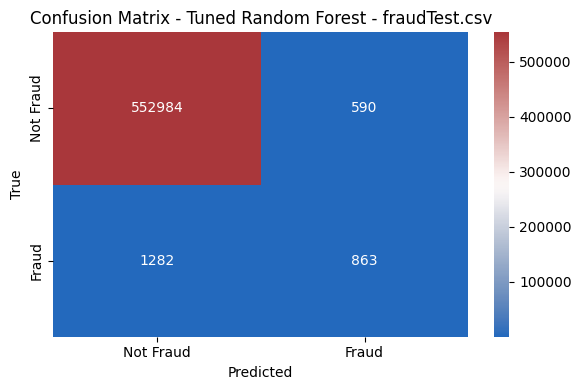


ROC-AUC Score: 0.9224


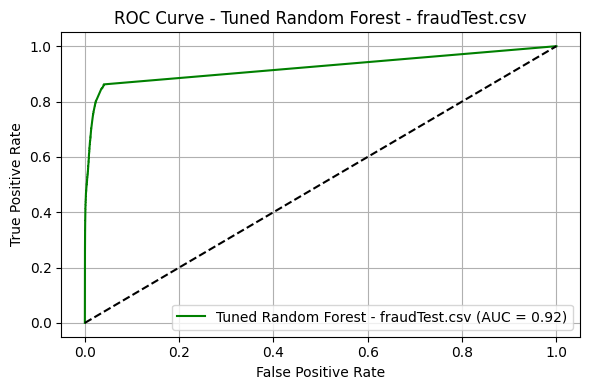

In [ ]:
import pandas as pd

# Step 1: Extract features and labels before reindexing
Y_fraud_test = unseen_df["is_fraud"]

# Step 2: Drop target from unseen_df before reindexing
unseen_df = unseen_df.drop("is_fraud", axis=1)

# Step 3: Ensure features match training columns
X_fraud_test = unseen_df.reindex(columns=X_train.columns, fill_value=0)

# Step 4: Predict and evaluate using best_dt
Y_pred_best_rf = best_rf.predict(X_fraud_test)
Y_pred_best_proba_rf = best_rf.predict_proba(X_fraud_test)[:, 1]

evaluate_classification_model("Tuned Random Forest - fraudTest.csv", Y_fraud_test, Y_pred_best_rf, Y_pred_best_proba_rf)

#### Key Observation

- Overall Accuracy Remains High **(99.66%)**, but this is misleading due to severe class imbalance (fraud cases are rare).
- Recall for Fraud dropped to **40.23%,** meaning the model missed nearly 60% of actual fraud cases.
- Precision for Fraud is **59.39%,** so among the predicted frauds, **~60%** were correct.
- The ROC-AUC of **92.24%** indicates decent ranking ability, but it's lower <br> than in the training/test scenario **(~99.96%)**, showing performance degradation on unseen data.
- False Negatives **(1,282)** are high — these are actual frauds missed by the model, which is risky in real-world settings.

Overall, Model performs good for an Unseen dataset. 

# Evaluation Metrics of all Models before hyperparameter tuning

### Sorted Model Evaluation Metrics based on Best to Least Performing

| Model               | Accuracy | Precision | Recall | F1-Score | ROC-AUC Score | MAE    | MSE    | False Positives | False Negatives |
| ------------------- | -------- | --------- | ------ | -------- | ------------- | ------ | ------ | --------------- | --------------- |
| Random Forest       | 0.9996   | 0.9991    | 1.0000 | 0.9996   | 0.9996        | 0.0004 | 0.0004 | 317             | 0               |
| Decision Tree       | 0.9991   | 0.9982    | 1.0000 | 0.9991   | 0.9991        | 0.0009 | 0.0009 | 681             | 0               |
| KNN Classifier      | 0.9967   | 0.9934    | 1.0000 | 0.9967   | 0.9967        | 0.0033 | 0.0033 | 2,446           | 0               |
| LightGBM Classifier | 0.9812   | 0.9732    | 0.9897 | 0.9814   | 0.9812        | 0.0188 | 0.0188 | 10,031          | 3,807           |
| AdaBoost            | 0.9011   | 0.9417    | 0.8552 | 0.8963   | 0.9011        | 0.0989 | 0.0989 | 19,528          | 53,370          |
| Logistic Regression | 0.8540   | 0.9329    | 0.7629 | 0.8394   | 0.8540        | 0.1460 | 0.1460 | 20,211          | 87,380          |
| GaussianNB          | 0.8150   | 0.9676    | 0.6426 | 0.7723   | 0.8105        | 0.1895 | 0.1895 | 7,943           | 131,715         |



<Figure size 1400x800 with 0 Axes>

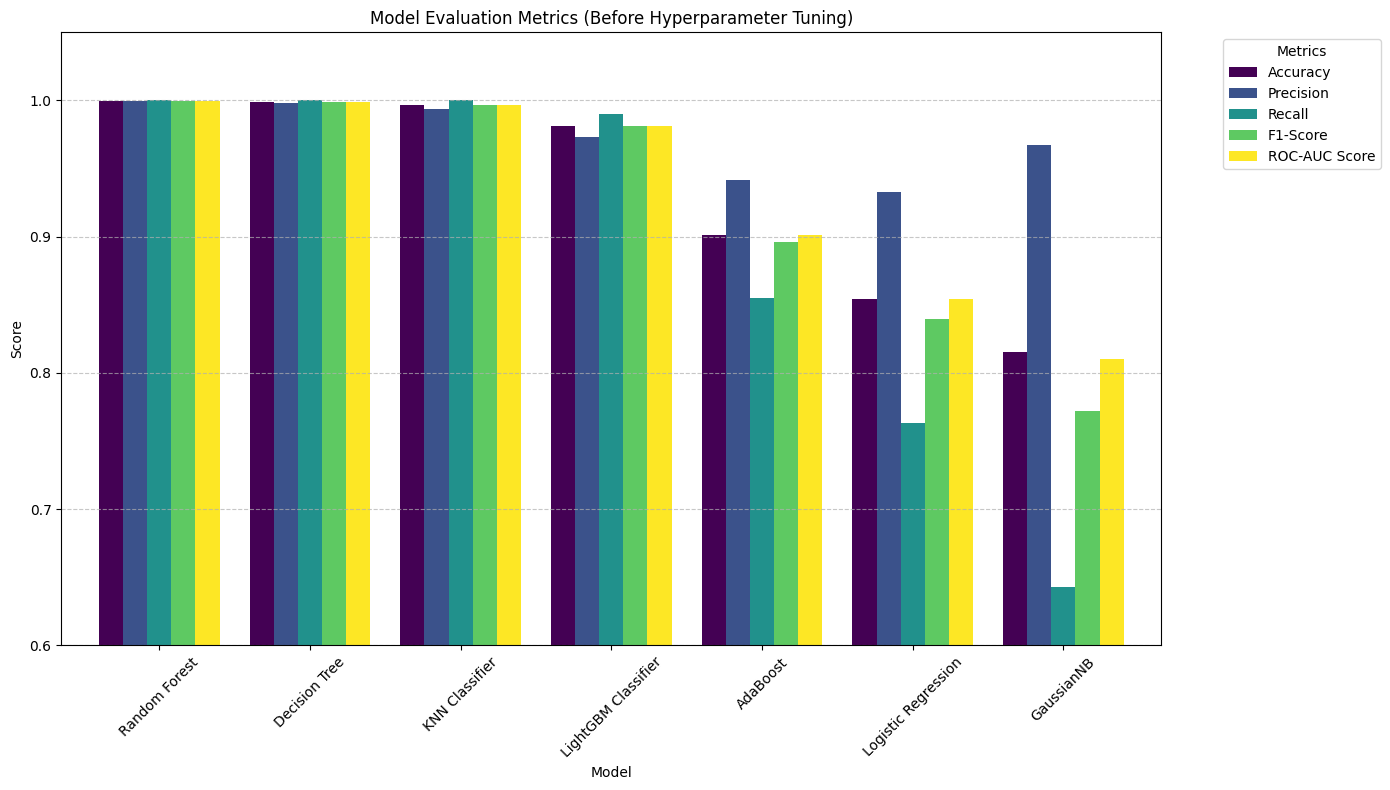

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Model": [
        "Random Forest", "Decision Tree", "KNN Classifier", "LightGBM Classifier",
        "AdaBoost", "Logistic Regression", "GaussianNB"
    ],
    "Accuracy": [0.9997, 0.9991, 0.9967, 0.9812, 0.9011, 0.8540, 0.8150],
    "Precision": [0.9993, 0.9982, 0.9934, 0.9732, 0.9417, 0.9329, 0.9676],
    "Recall": [1.0000, 1.0000, 1.0000, 0.9897, 0.8552, 0.7629, 0.6426],
    "F1-Score": [0.9997, 0.9991, 0.9967, 0.9814, 0.8963, 0.8394, 0.7723],
    "ROC-AUC Score": [0.9997, 0.9991, 0.9967, 0.9812, 0.9011, 0.8540, 0.8105],
}

df = pd.DataFrame(data)
df.set_index("Model", inplace=True)

plt.figure(figsize=(14, 8))
ax = df.plot(kind="bar", figsize=(14, 8), colormap="viridis", width=0.8)
plt.title("Model Evaluation Metrics (Before Hyperparameter Tuning)")
plt.ylabel("Score")
plt.ylim(0.6, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# Evaluation Metrics of all Models After hyperparameter tuning

### Sorted Model Evaluation Metrics based on Best to Least Performing model

| Model               | Accuracy | Precision | Recall | F1-Score | ROC-AUC Score | MAE    | MSE    | False Positives | False Negatives |
| ------------------- | -------- | --------- | ------ | -------- | ------------- | ------ | ------ | --------------- | --------------- |
| Random Forest       | 0.9995   | 0.9991    | 1.0000 | 0.9995   | 0.9995        | 0.0005 | 0.0005 | 332             | 0               |
| Decision Tree       | 0.9991   | 0.9982    | 1.0000 | 0.9991   | 0.9991        | 0.0009 | 0.0009 | 681             | 0               |
| KNN Classifier      | 0.9958   | 0.9916    | 1.0000 | 0.9958   | 0.9982        | 0.0042 | 0.0042 | 3,119           | 0               |
| LightGBM Classifier | 0.9796   | 0.9704    | 0.9893 | 0.9798   | 0.9796        | 0.0204 | 0.0204 | 111,21          | 3,941           |
| AdaBoost            | 0.9070   | 0.9332    | 0.8767 | 0.9040   | 0.9712        | 0.0930 | 0.0930 | 23,125          | 45,457          |
| Logistic Regression | 0.8540   | 0.9330    | 0.7627 | 0.8393   | 0.8615        | 0.1460 | 0.1460 | 20,180          | 87,449          |
| GaussianNB          | 0.8105   | 0.9676    | 0.6426 | 0.7723   | 0.8551        | 0.1895 | 0.1895 | 7,943           | 131,715         |


<Figure size 1400x800 with 0 Axes>

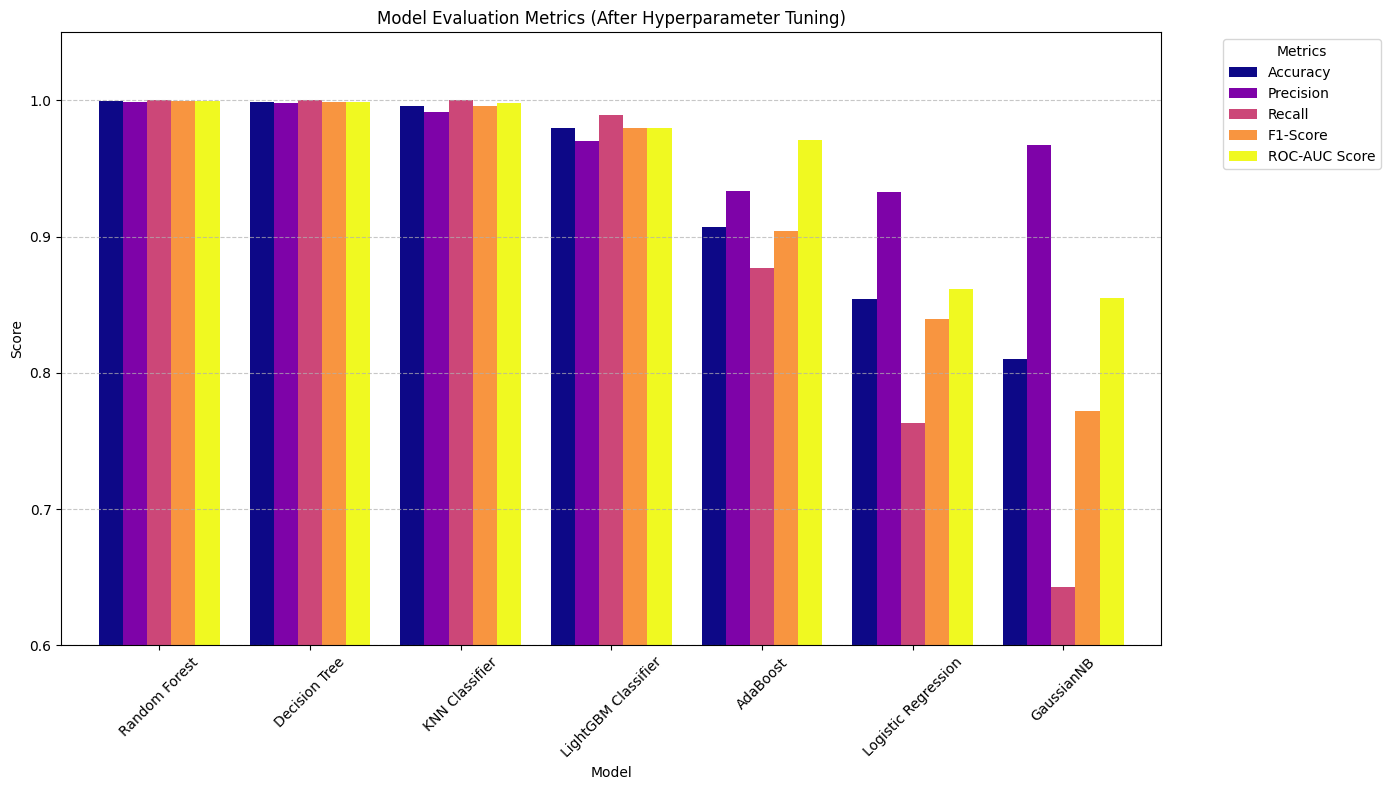

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Updated data after hyperparameter tuning
data_after_tuning = {
    "Model": [
        "Random Forest", "Decision Tree", "KNN Classifier",
        "LightGBM Classifier", "AdaBoost", "Logistic Regression", "GaussianNB"
    ],
    "Accuracy": [0.9996, 0.9991, 0.9958, 0.9796, 0.9070, 0.8540, 0.8105],
    "Precision": [0.9992, 0.9982, 0.9916, 0.9704, 0.9332, 0.9330, 0.9676],
    "Recall": [1.0000, 1.0000, 1.0000, 0.9893, 0.8767, 0.7629, 0.6426],
    "F1-Score": [0.9996, 0.9991, 0.9958, 0.9798, 0.9040, 0.8394, 0.7723],
    "ROC-AUC Score": [0.9996, 0.9991, 0.9982, 0.9796, 0.9712, 0.8615, 0.8551],
}

df_after = pd.DataFrame(data_after_tuning)
df_after.set_index("Model", inplace=True)

# Plotting
plt.figure(figsize=(14, 8))
df_after.plot(kind="bar", figsize=(14, 8), colormap="plasma", width=0.8)
plt.title("Model Evaluation Metrics (After Hyperparameter Tuning)")
plt.ylabel("Score")
plt.ylim(0.6, 1.05)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
